# **PREDICTING THE TEN YEAR RISK OF DEVELOPING HEART DISEASE USING MACHINE LEARNING**

# <h1 style='background:#4682B4; border:2; border-radius: 10px; font-size:250%; font-weight: bold; color:black'><center>Personal Key Indicators of Heart Disease</center></h1>

<img src = "https://i.gifer.com/1mT3.gif" width = 900 height = 400/>

Heart disease (heart disease) is a group of diseases related to cardiovascular diseases, manifested by a violation of the normal functioning of the heart. May be caused by damage to the epicardium, pericardium, myocardium, endocardium, valvular apparatus of the heart, heart vessels.

Heart disease can last a long time in a latent form, clinically not manifesting itself. Along with various tumors, these diseases are today the main cause of premature death in developed countries.

The uninterrupted operation of the circulatory system, which consists of the heart as a muscle pump and a network of blood vessels, is a necessary condition for the normal functioning of the body.

According to the National Heart, Lung and Blood Institute in Framingham (USA), the most important factors in the development of cardiovascular disease in humans are obesity, sedentary lifestyle and smoking.



# INTRODUCTION

Coronary Heart Disease (CHD) remains a critical global health concern, responsible for a substantial portion of cardiovascular-related morbidity and mortality. Identifying individuals at risk of developing CHD is paramount for timely intervention and prevention efforts. This project aims to harness the power of data analysis and predictive modeling to better understand the factors associated with Ten-Year CHD risk and to build a reliable predictive model.

# Background

CHD is a complex, multifactorial condition influenced by a myriad of genetic, lifestyle, and medical factors. Understanding the interplay between these factors can significantly improve our ability to identify individuals at heightened risk. To achieve this, we are utilizing a comprehensive dataset encompassing various demographic, medical, and lifestyle-related variables.

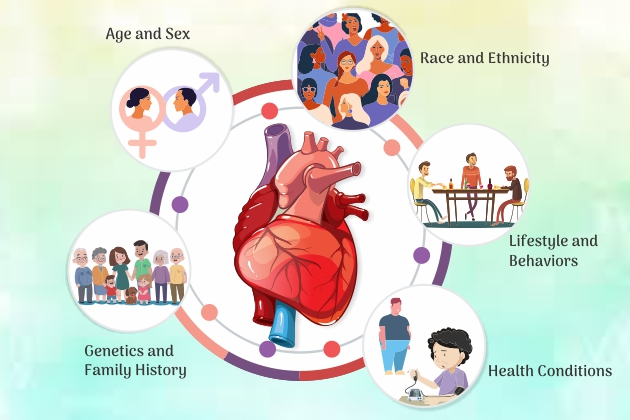

# Dataset Description

The dataset under investigation contains information on individuals, including features such as age, education level, gender, smoking status, and various health-related measurements (e.g., cholesterol levels, blood pressure, BMI, and glucose levels). The dataset also includes a crucial target variable, "TenYearCHD," which indicates whether an individual is at risk of developing CHD within the next ten years (1 for at risk, 0 for not at risk).

# Objectives

The primary objectives of this project are as follows:

1. Data Exploration: Conduct a thorough exploration of the dataset to understand its structure, identify missing values, and gain insights into the distribution of key variables.

2. Feature Analysis: Analyze the dataset's features to determine their suitability for predicting Ten-Year CHD risk. Categorize features as numeric, categorical, ordinal, or nominal.

3. Dependency Analysis: Employ statistical tests, including the Chi-squared test for categorical features and t-tests or ANOVA for numeric features, to assess the dependency of each feature on the Ten-Year CHD target variable.

4. Data Preprocessing: Prepare the dataset for modeling by handling missing values, encoding categorical variables, and scaling or normalizing numeric features.

5. Model Building: Develop predictive models using machine learning algorithms to predict Ten-Year CHD risk based on the selected features.

6. Model Evaluation: Assess the performance of the developed models using appropriate evaluation metrics (e.g., accuracy, precision, recall, ROC curve) to determine their predictive capability.

7. Interpretation: Interpret the results to identify the most influential factors contributing to Ten-Year CHD risk.


# Significance

This project's significance lies in its potential to contribute to early CHD risk assessment, which can enable targeted interventions and lifestyle modifications for at-risk individuals. Moreover, it underscores the importance of data-driven approaches in healthcare decision-making and highlights the relevance of predictive modeling in preventive medicine.

In the following sections, we will delve into the dataset, conduct rigorous analysis, build predictive models, and ultimately aim to enhance our understanding of the factors influencing Ten-Year CHD risk.



# importing necessary libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
!pip install imblearn

  Using cached numpy-1.24.4-cp38-cp38-win_amd64.whl.metadata (5.6 kB)
     ------                                   10.2/59.0 kB ? eta -:--:--


ERROR: Exception:
Traceback (most recent call last):
  File "E:\Reborn\lib\site-packages\pip\_vendor\urllib3\response.py", line 438, in _error_catcher
    yield
  File "E:\Reborn\lib\site-packages\pip\_vendor\urllib3\response.py", line 561, in read
    data = self._fp_read(amt) if not fp_closed else b""
  File "E:\Reborn\lib\site-packages\pip\_vendor\urllib3\response.py", line 527, in _fp_read
    return self._fp.read(amt) if amt is not None else self._fp.read()
  File "E:\Reborn\lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 98, in read
    data: bytes = self.__fp.read(amt)
  File "E:\Reborn\lib\http\client.py", line 459, in read
    n = self.readinto(b)
  File "E:\Reborn\lib\http\client.py", line 503, in readinto
    n = self.fp.readinto(b)
  File "E:\Reborn\lib\socket.py", line 669, in readinto
    return self._sock.recv_into(b)
  File "E:\Reborn\lib\ssl.py", line 1274, in recv_into
    return self.read(nbytes, buffer)
  File "E:\Reborn\lib\ssl.py", line 1132, in r

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

#Data Analysis
import pandas as pd
import numpy as np


#Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.offline as py
import plotly.express as px
import plotly.graph_objs as go


#Pre processing / Feature Engineering
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectFromModel


#Machine Learning
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn import model_selection
from sklearn.utils import class_weight
from xgboost import XGBClassifier

#Evaluating algorithms
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report

#Dealing with imbalanced dataset
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss

The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD). The dataset provides the patients’ information. It includes over 4240 records and 15 attributes.

# Variables
Each attribute is a potential risk factor. There are both demographic behavioral, and medical risk factors.

# Data Description
## Demographic:
- **Male**: male or female(1 or 0)
- **Age**: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)
- **Education**:1:Higher Secondary,2:Graduation,3:Post Graduation,4:PHD

## Behavioral
- **currentSmoker**: whether or not the patient is a current smoker ("YES" or "NO")
- **Cigs Per Day**: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

### Medical( history)
- **BP Meds**: whether or not the patient was on blood pressure medication (Nominal)
- **Prevalent Stroke**: whether or not the patient had previously had a stroke (Nominal)
- **Prevalent Hyp**: whether or not the patient was hypertensive (Nominal)
- **Diabetes**: whether or not the patient had diabetes (Nominal)

### Medical(current)

- **Tot Chol**: total cholesterol level (Continuous)
- **Sys BP**: systolic blood pressure (Continuous)
- **Dia BP**: diastolic blood pressure (Continuous)
- **BMI**: Body Mass Index (Continuous)
- **Heart Rate**: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
- **Glucose**: glucose level (Continuous)

### Predict variable (desired target)
- 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) - DV

1. **Continuous Data**:
   - **Definition**: Data that can take any value within a given range.
   - **Characteristics**: Can be measured, has infinite possible values between any two values.
   - Examples:
     - Height (e.g., 5.7 feet, 6.2 feet)
     - Weight (e.g., 68.5 kg, 70.2 kg)
     - Temperature (e.g., 98.6°F, 37.2°C)
     - Time (e.g., 3.5 hours, 2.7 minutes)

2. **Categorical Data**:
   - **Definition**: Data that can be divided into specific groups or categories.
   - **Characteristics**: Finite number of possible values, often non-numerical.
   - Categorical data can be further divided into nominal and ordinal data:

   a) **Nominal Data**:
      - **Definition**: Categories with no inherent order or ranking.
      - **Characteristics**: Can be labelled but not ordered.
      - **Examples**:
        - Colors (Red, Blue, Green)
        - Gender (Male, Female, Non-binary)
        - Blood types (A, B, AB, O)
        - Marital status (Single, Married, Divorced)

   b) **Ordinal Data**:
      - **Definition**: Categories with a clear, meaningful order or ranking.
      - **Characteristics**: Can be labelled and ordered, but the intervals between values may not be consistent.
      - **Examples**:
        - Education levels (High School, Bachelor's, Master's, PhD)
        - Customer satisfaction ratings (Very Unsatisfied, Unsatisfied, Neutral, Satisfied, Very Satisfied)
        - Spiciness levels (Mild, Medium, Hot, Extra Hot)
        - T-shirt sizes (S, M, L, XL)

In the context of your heart disease project:

- Continuous data might include:
  - Age
  - Blood pressure readings
  - Cholesterol levels
  - BMI

- Categorical data might include:
  - Nominal:
    - Sex (Male/Female)
    - Smoking status (Smoker/Non-smoker)
    - Presence of diabetes (Yes/No)

  - Ordinal:
    - Education level
    - Severity of chest pain (if categorized)

Understanding these data types is crucial for choosing appropriate statistical methods, visualization techniques, and machine learning algorithms in your analysis.

**# Loading and Exploring the Dataset**


In [4]:
df=pd.read_csv("../Data/framingham.csv")

In [5]:
# First five rows
df.head()

male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2           0  
3           1  
4           0

In [6]:
# checking random rows
df.sample(5)

male  age  education  currentSmoker  cigsPerDay  BPMeds  \
3454     1   47        4.0              0         0.0     0.0   
2689     0   40        2.0              0         0.0     0.0   
209      1   43        2.0              1        30.0     0.0   
1433     0   55        1.0              0         0.0     0.0   
199      1   60        1.0              0         0.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
3454                0             1         0    254.0  138.0   96.0  29.73   
2689                0             0         0    159.0  142.0   90.5  22.31   
209                 0             0         0    185.0  125.0   65.0  20.65   
1433                0             0         0    252.0  130.0   82.0  29.17   
199                 0             0         0    240.0  137.0   84.0  29.51   

      heartRate  glucose  TenYearCHD  
3454       63.0     69.0           0  
2689      100.0      NaN           0  
209        96.0     76.0           0  
1433       78.0     85.0           0  
199        82.0     88.0           0

In [7]:
# information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


# **Data Preprocessing**

# **A. Data distribution**

To visualize the dataset's distribution, we can create a histogram.

- **Age**: It follows a normal distribution, indicating symmetrical variation among the age intervals.
- **Education**: It exhibits a positively skewed distribution, suggesting a lack of symmetry in the data.
- **Total Cholesterol (totChol), Systolic Blood Pressure (sysBP), Diastolic Blood Pressure (diaBP), and BMI (Body Mass Index)**:
These variables follow a normal distribution, showing symmetrical differences, and no outliers are present in the data.
- **Heart rate** and **glucose** levels follow a normal distribution, but outliers are present in the data.
- **Cigarettes Per Day (CigsPerDay)**: It is positively skewed.
- **Blood Pressure Medication (BPMeds), Prevalent Stroke, and Diabetes**: These variables indicate the presence of outliers in the data.

# **B. Checking for Missing Values**

In [8]:
missing_data=df.isnull().sum()
print("\nMissing data:")
print(missing_data)
total_percentage=(missing_data.sum()/df.shape[0])*100
print(f"The total percentage of missing data is {round(total_percentage,2)}%")


Missing data:
male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64
The total percentage of missing data is 15.21%


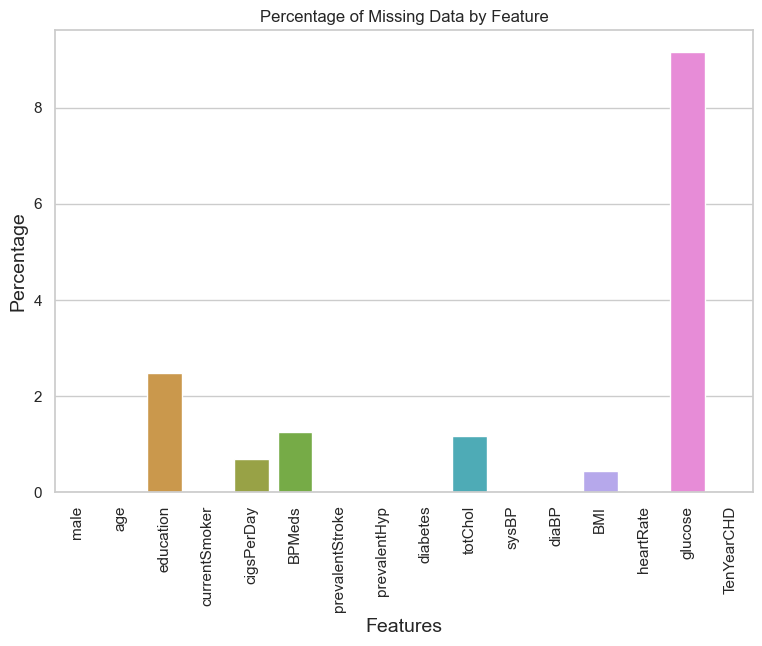

In [9]:
# Calculate the percentage of missing data for each feature
missing_data = missing_data.to_frame(name='Total')  # Convert Series to DataFrame
missing_data['Percentage'] = (missing_data['Total'] / len(df)) * 100

# Create a bar plot to visualize the percentage of missing data by feature
plt.figure(figsize=(9, 6))
sns.set(style="whitegrid")
sns.barplot(x=missing_data.index, y=missing_data['Percentage'], data=missing_data)
plt.title("Percentage of Missing Data by Feature")
plt.xlabel("Features", fontsize=14)
plt.ylabel("Percentage", fontsize=14)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

- The feature `glucose` stands out with the highest missing data percentage, approximately 9%. While some other features have minimal missing data.
- Imputing missing values, especially in a healthcare dataset like this, could introduce potential biases. Consulting with domain experts is crucial because healthcare data directly impacts individuals' lives, making it essential to proceed cautiously with any data imputation methods.

In [10]:
# Drop missing values
df.dropna(axis=0,inplace=True)

In [11]:
df.shape

(3658, 16)

## **Case Counts**

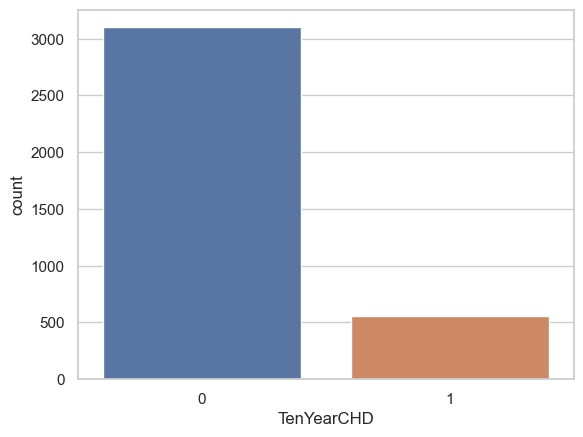

There are 3101 patients without heart disease and 557 patients with heart disease


In [12]:
sns.countplot(x="TenYearCHD",data=df)
plt.show()
cases=df.TenYearCHD.value_counts()
print(f"There are {cases[0]} patients without heart disease and {cases[1]} patients with heart disease")

In [13]:
3101/557

5.567324955116697

- The ratio of individuals without the disease to those with the disease is approximately 1:5.56, indicating a significant class imbalance. 
- This imbalance should be considered when developing and evaluating predictive models, as it may impact the model's performance and interpretation.

In [14]:
df["age"].unique

<bound method Series.unique of 0       39
1       46
2       48
3       61
4       46
        ..
4233    50
4234    51
4237    52
4238    40
4239    39
Name: age, Length: 3658, dtype: int64>

In [15]:
df["age"].min()

32

In [16]:
df["age"].max()

70

In [17]:
df.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [18]:
categorical_features=['male','education','currentSmoker','BPMeds','prevalentStroke','prevalentHyp','diabetes']

In [19]:
for feature in categorical_features:
  print(feature,":")
  print(df[feature].value_counts())
  print("------------------")

male :
0    2035
1    1623
Name: male, dtype: int64
------------------
education :
1.0    1526
2.0    1101
3.0     608
4.0     423
Name: education, dtype: int64
------------------
currentSmoker :
0    1869
1    1789
Name: currentSmoker, dtype: int64
------------------
BPMeds :
0.0    3547
1.0     111
Name: BPMeds, dtype: int64
------------------
prevalentStroke :
0    3637
1      21
Name: prevalentStroke, dtype: int64
------------------
prevalentHyp :
0    2518
1    1140
Name: prevalentHyp, dtype: int64
------------------
diabetes :
0    3559
1      99
Name: diabetes, dtype: int64
------------------


In [20]:
# Now for the continuous variables
numeric_features=["age","cigsPerDay","totChol","sysBP","diaBP","BMI","heartRate","glucose"]


# **Exploratory Data** **Analysis**

## **Univariant** **Analysis**

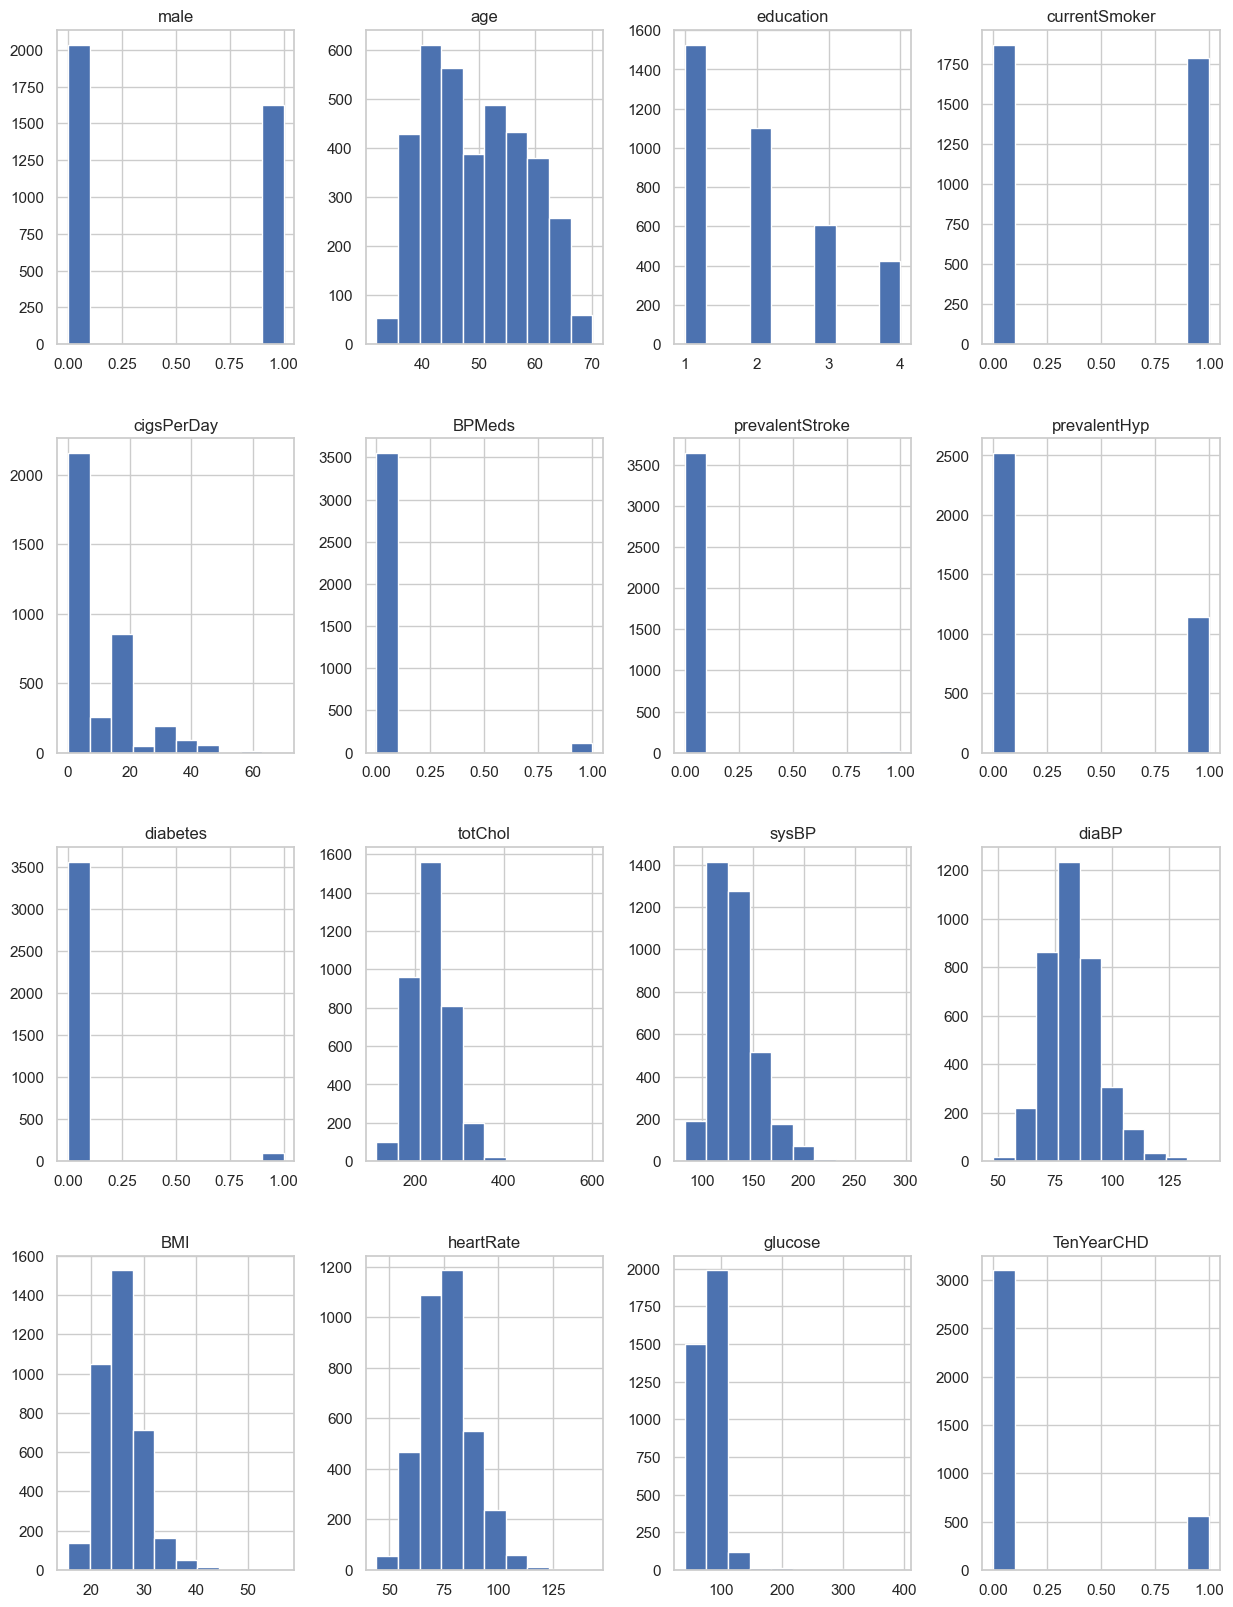

In [21]:
fig=plt.figure(figsize=(15,20))
ax =fig.gca()
df.hist(ax = ax)
plt.show()

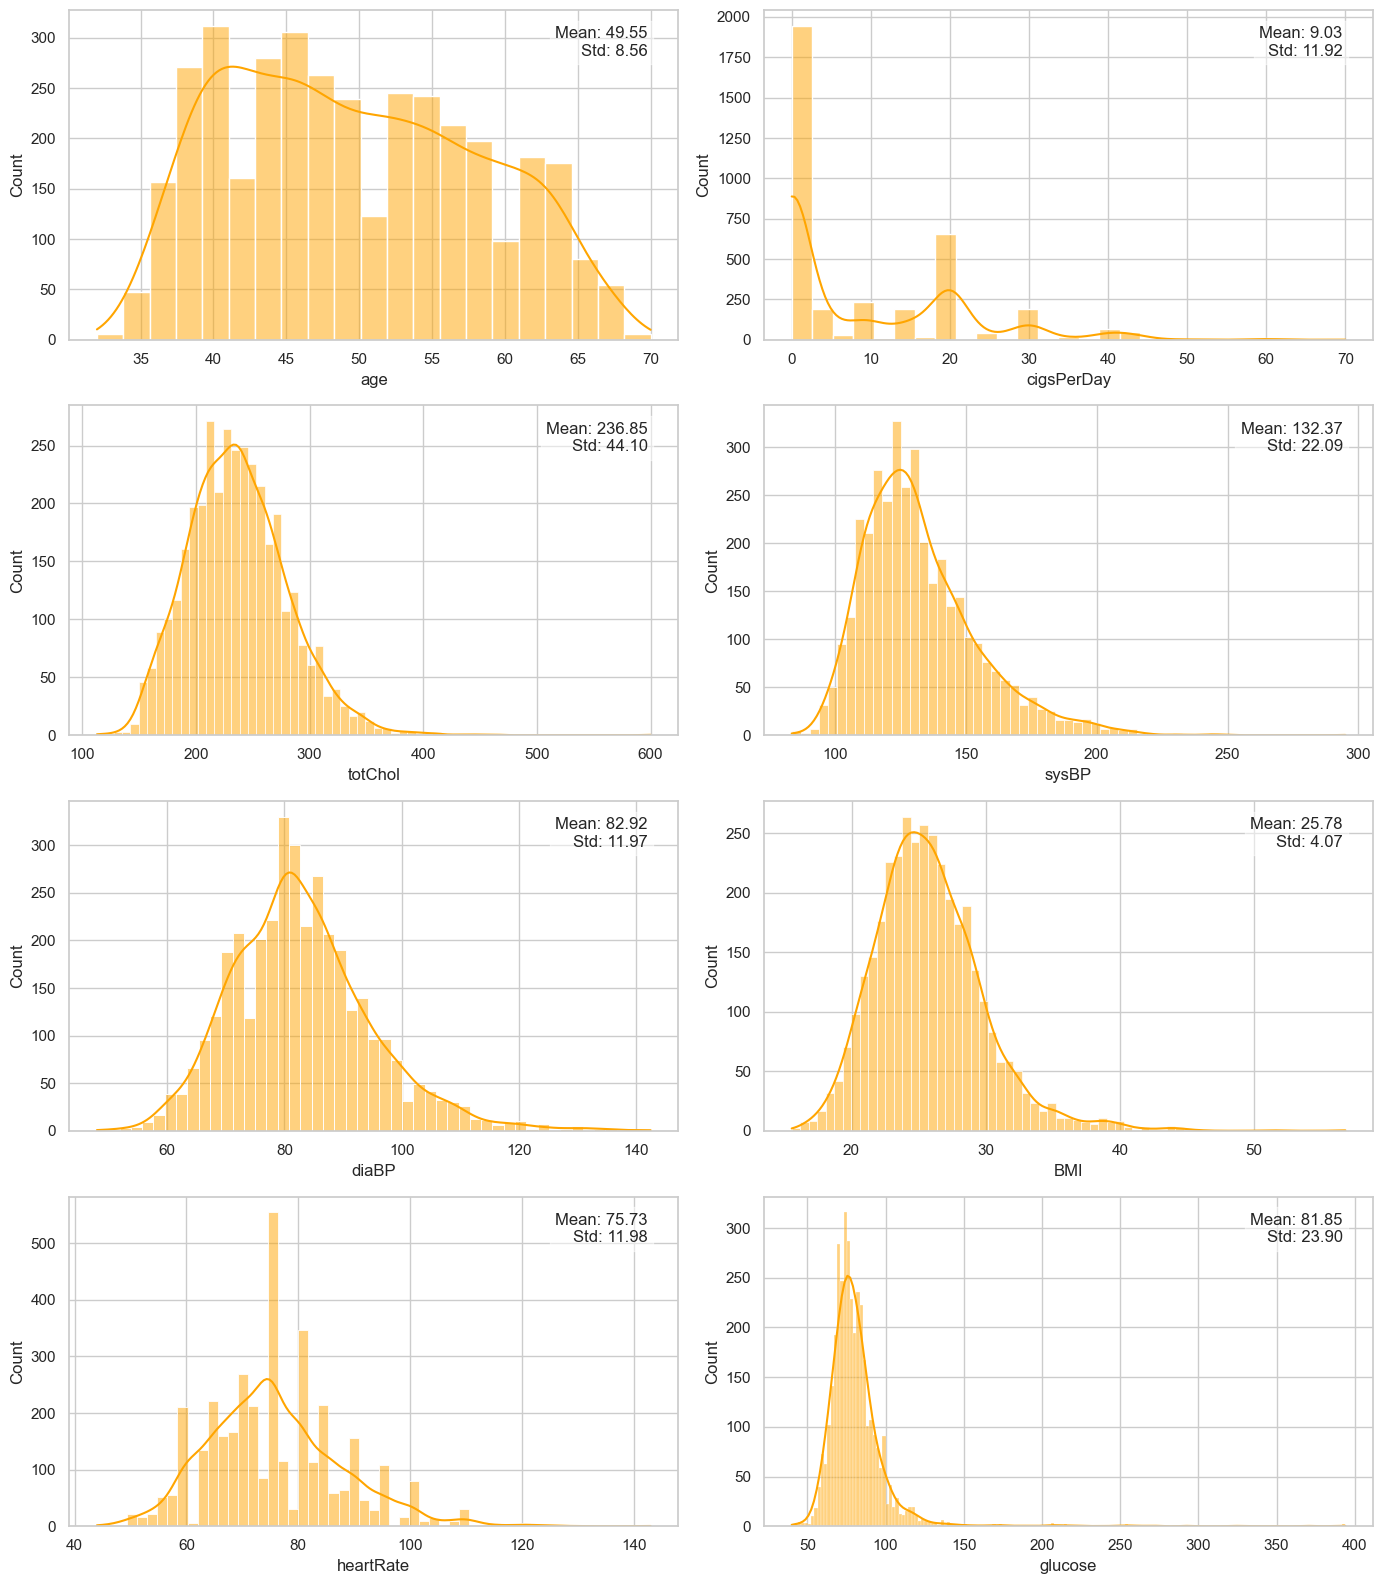

In [22]:
f, axes = plt.subplots(4, 2, figsize=(14, 16))
index1 = 0
index2 = 0

for col in numeric_features:
    mean = df[col].mean()
    std = df[col].std()
    
    sns.histplot(df[col], ax=axes[index1][index2], color='orange', kde=True)
    
    # Add mean and standard deviation text on the plot
    axes[index1][index2].text(0.95, 0.95, f'Mean: {mean:.2f}\nStd: {std:.2f}', 
                              transform=axes[index1][index2].transAxes, 
                              verticalalignment='top', 
                              horizontalalignment='right', 
                              fontsize=12, 
                              bbox=dict(facecolor='white', alpha=0.5))

    index2 += 1
    if index2 == 2:
        index2 = 0
        index1 += 1

plt.tight_layout()
plt.show()

- The variable 'Cigarettes Per Day (CigsPerDay)' exhibits a highly uneven distribution.

- Similarly, 'Heart Rate' (heartRate) also displays an uneven distribution.

- In contrast, 'Glucose' (glucose), 'BMI' (Body Mass Index), 'Diastolic Blood Pressure (diaBP)', 'Systolic Blood Pressure (sysBP)', and 'Total Cholesterol (totChol)' demonstrate more even distributions.

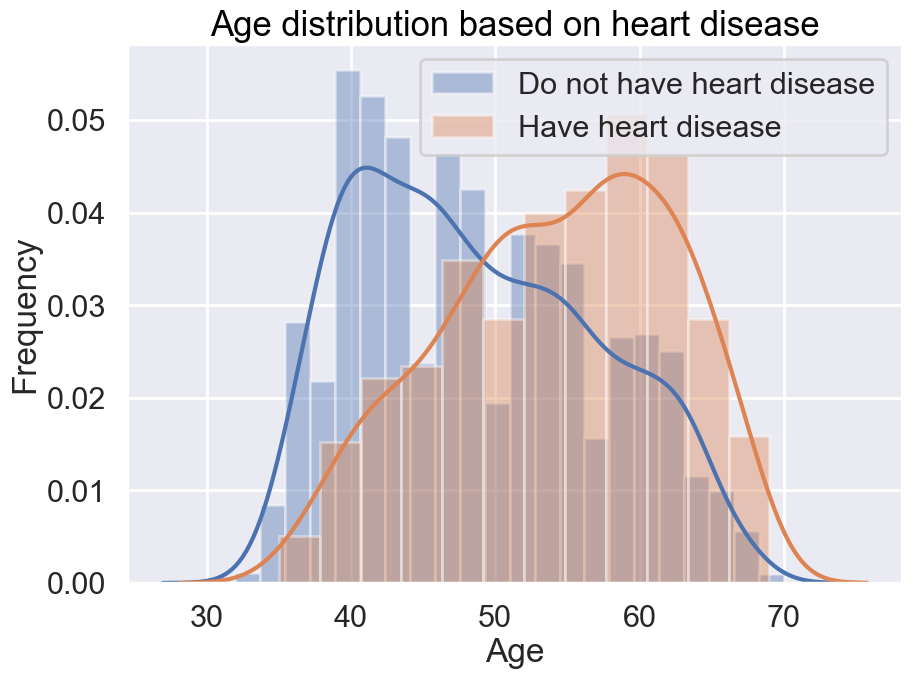

In [23]:
sns.set_theme(context='poster')
plt.figure(figsize=(10,7))
plt.title('Age distribution based on heart disease', color="Black",fontsize=25)

sns.distplot(df[df['TenYearCHD'] == 0]['age'], label='Do not have heart disease')
sns.distplot(df[df['TenYearCHD'] == 1]['age'], label = 'Have heart disease')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()

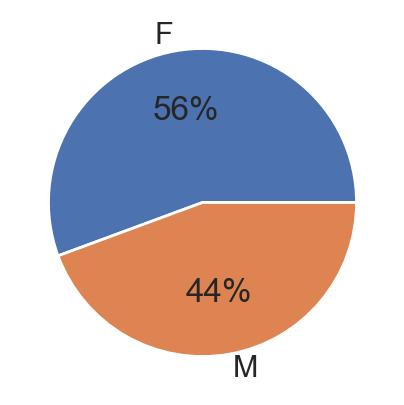

In [24]:
# list for the sex column
gender = ['F','M']

# make an object which store value count of the elements in sex column
gender_data = pd.Series(df['male']).value_counts()

# adjust size of the pie chart
plt.figure(figsize=(5,5))

# ploting pie chart
plt.pie(gender_data,labels=gender,autopct='%.0f%%')

plt.show()

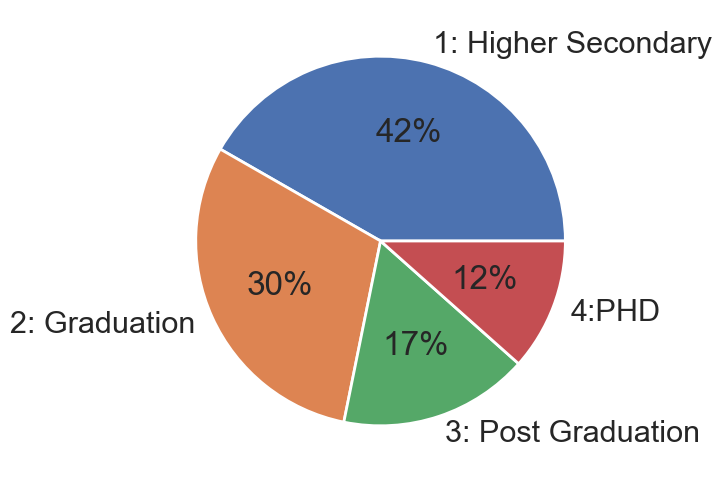

In [25]:
# list for the chest pain type column
chest_pain = [ '1: Higher Secondary', '2: Graduation',
              '3: Post Graduation','4:PHD']

# make an object which store value count of the elements in chest pain type column
cp_data = pd.Series(df['education']).value_counts()

# adjust size of the pie chart
plt.figure(figsize=(6,6))

# ploting pie chart
plt.pie(cp_data,labels=chest_pain,autopct='%.0f%%')
plt.show()

In [26]:
df.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

<AxesSubplot:xlabel='currentSmoker', ylabel='count'>

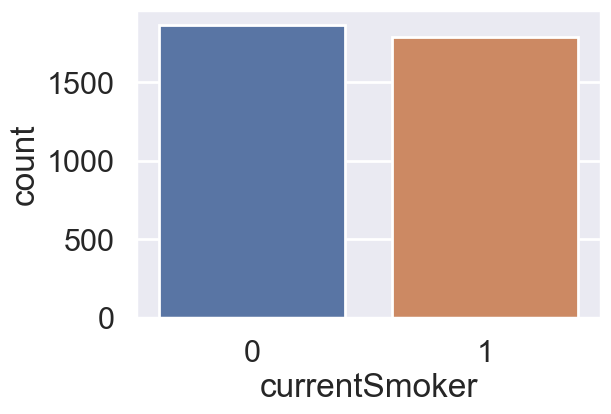

In [27]:
# count plot for  is_smoking column
plt.figure(figsize=(6,4))
sns.countplot(data=df,x='currentSmoker')

## **Bivariant** **Analysis**

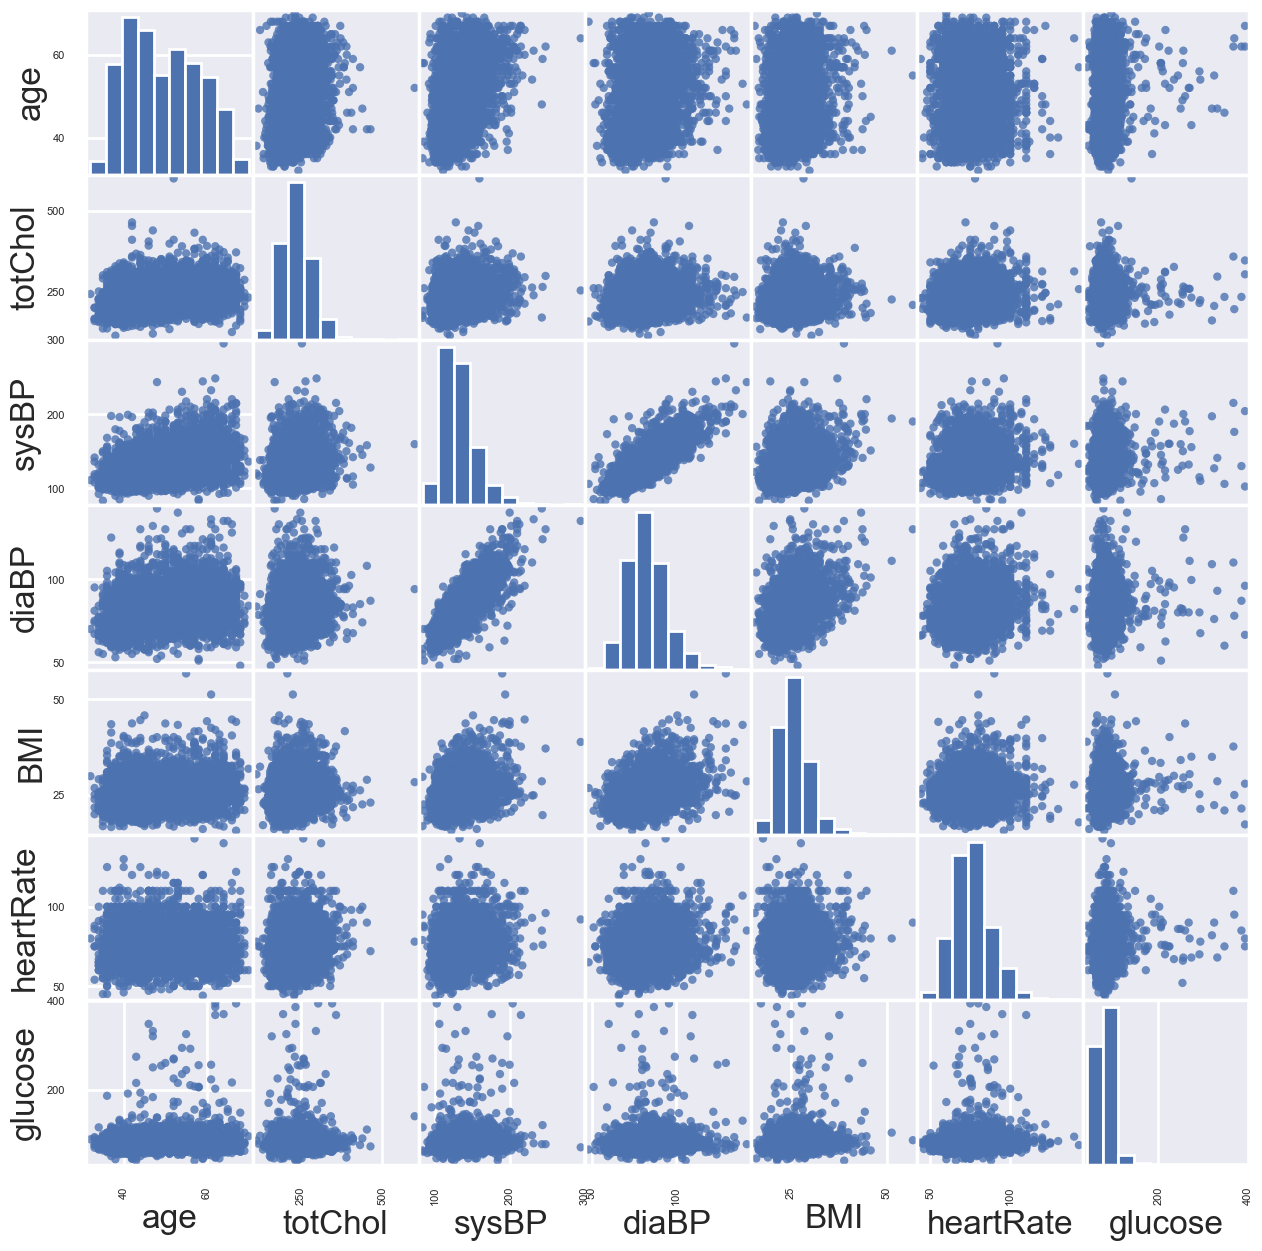

In [28]:
import matplotlib.pyplot as plt

# Define the features you want to include in the scatter plot
selected_features = ['age', 'totChol', 'sysBP', 'diaBP','BMI','heartRate','glucose']

# Create a scatter plot for the selected features
pd.plotting.scatter_matrix(df[selected_features], alpha=0.8, figsize=(15, 15), diagonal='hist')

# Show the plot
plt.show()

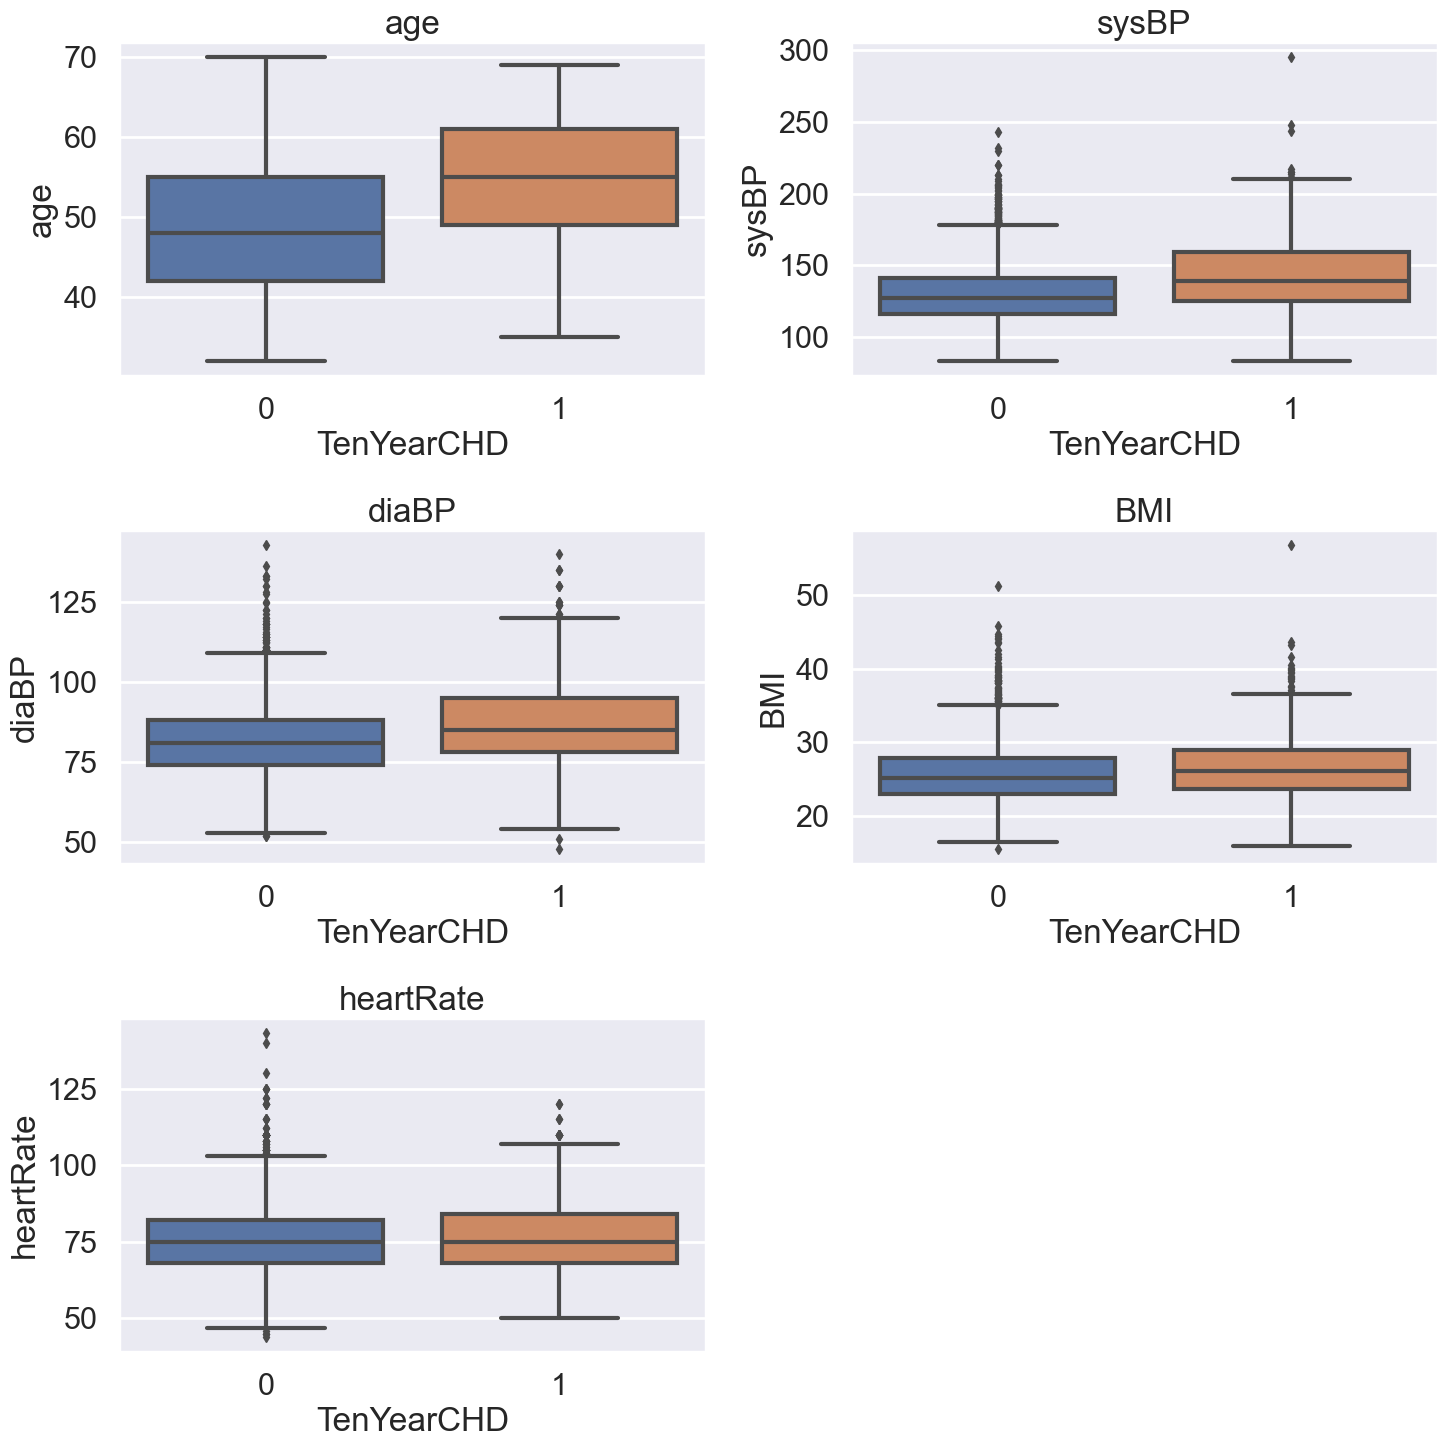

In [29]:
# making boxplots to see the distribution
plt.figure(figsize=(15,15))

plt.subplot(3,2,1)
sns.boxplot(x=df['TenYearCHD'],y=df['age'])
plt.title('age')

plt.subplot(3,2,2)
sns.boxplot(x=df['TenYearCHD'],y=df['sysBP'])
plt.title('sysBP')

plt.subplot(3,2,3)
sns.boxplot(x=df['TenYearCHD'],y=df['diaBP'])
plt.title('diaBP')

plt.subplot(3,2,4)
sns.boxplot(x=df['TenYearCHD'],y=df['BMI'])
plt.title('BMI')

plt.subplot(3,2,5)
sns.boxplot(x=df['TenYearCHD'],y=df['heartRate'])
plt.title('heartRate')

plt.tight_layout()

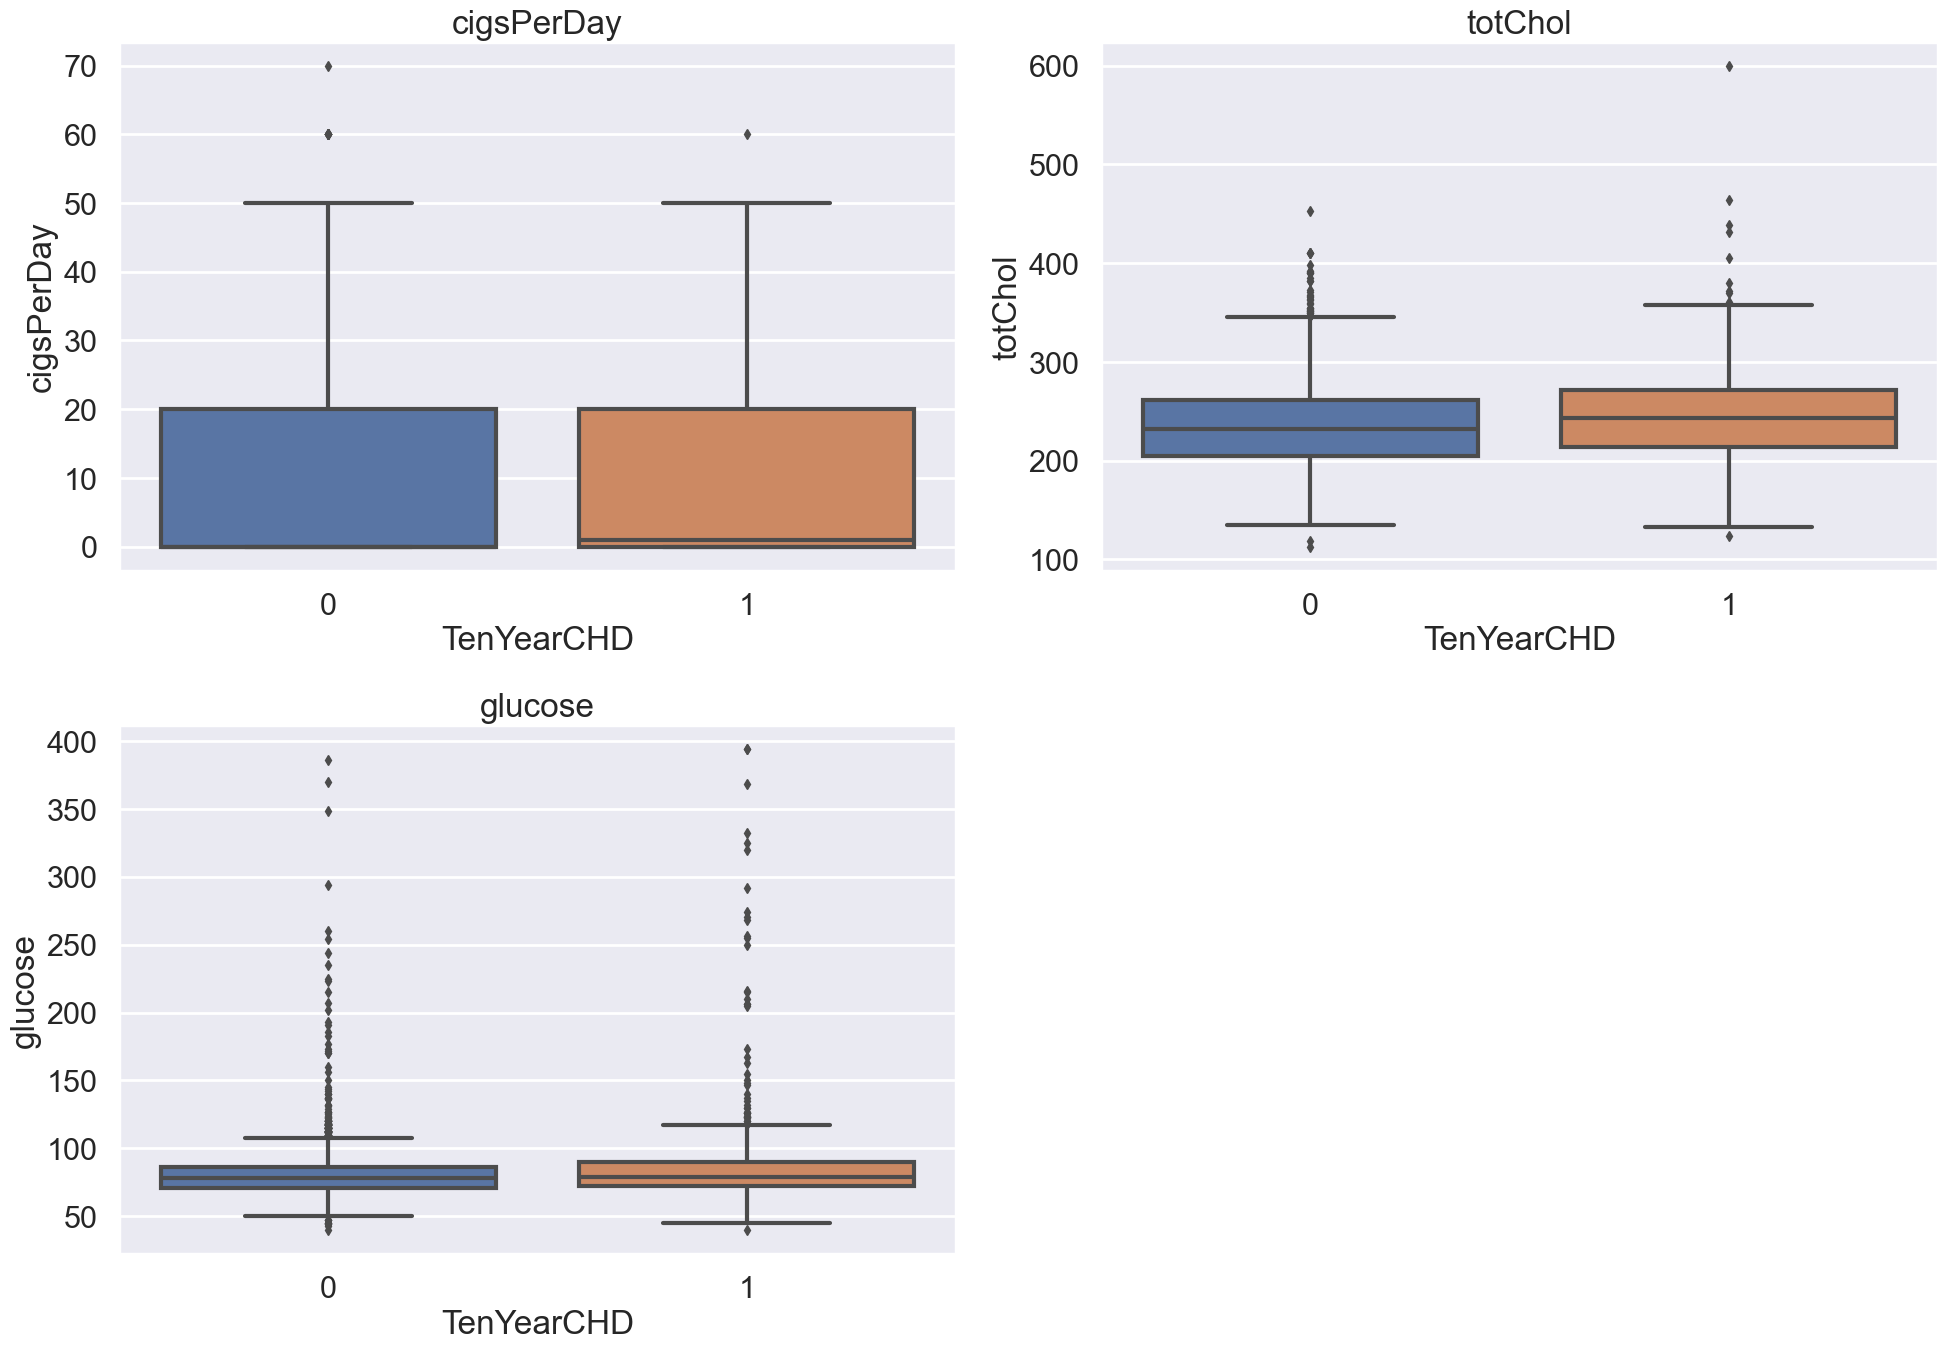

In [30]:
# making boxplots to see the distribution
plt.figure(figsize=(20,20))

plt.subplot(3,2,1)
sns.boxplot(x=df['TenYearCHD'],y=df['cigsPerDay'])
plt.title('cigsPerDay')

plt.subplot(3,2,2)
sns.boxplot(x=df['TenYearCHD'],y=df['totChol'])
plt.title('totChol')

plt.subplot(3,2,3)
sns.boxplot(x=df['TenYearCHD'],y=df['glucose'])
plt.title('glucose')

plt.tight_layout()

<Figure size 2000x2000 with 0 Axes>

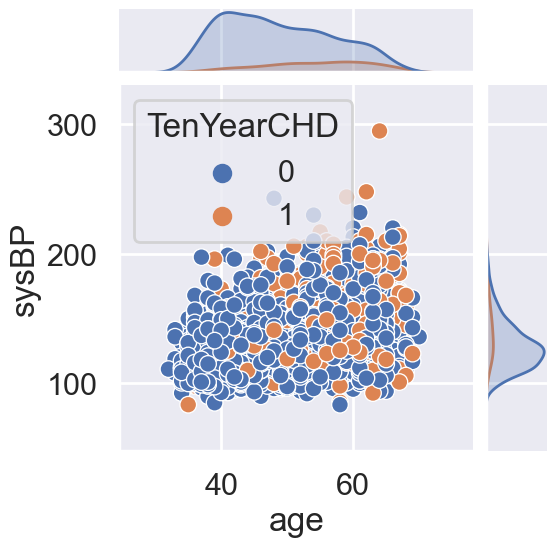

In [31]:
# jointplot for 'Age' vs 'sysBP'
plt.figure(figsize=(20,20))
sns.jointplot(data=df,x='age',y='sysBP',hue='TenYearCHD')

<Figure size 2000x2000 with 0 Axes>

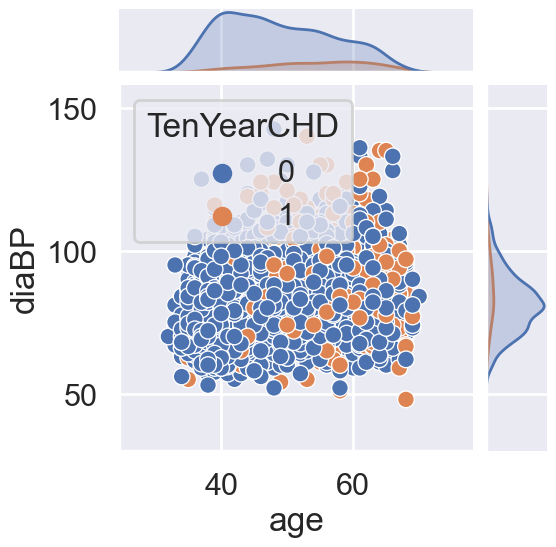

In [32]:
# jointplot for 'Age' vs 'diaBP'
plt.figure(figsize=(20,20))
sns.jointplot(data=df,x='age',y='diaBP',hue='TenYearCHD')

<Figure size 2000x2000 with 0 Axes>

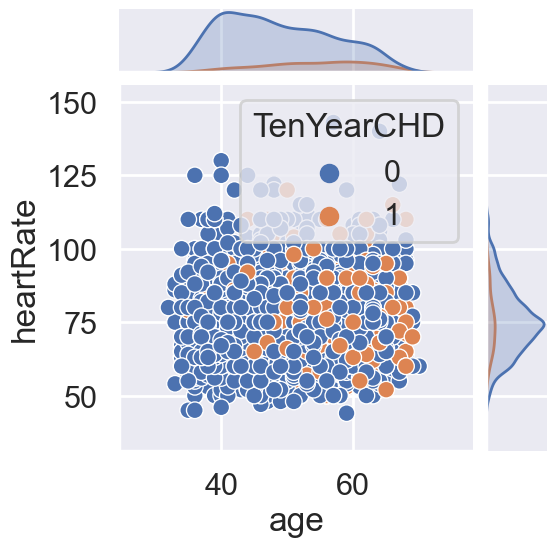

In [33]:
# jointplot for 'Age' vs 'heartRate'
plt.figure(figsize=(20,20))
sns.jointplot(data=df,x='age',y='heartRate',hue='TenYearCHD')

<Figure size 2000x2000 with 0 Axes>

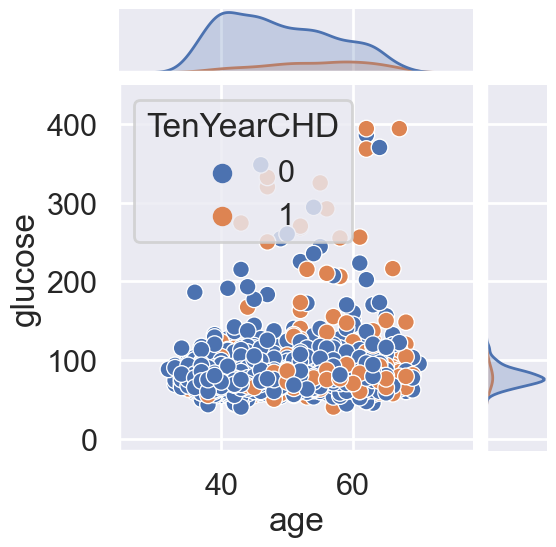

In [34]:
# jointplot for 'Age' vs 'glucose'
plt.figure(figsize=(20,20))
sns.jointplot(data=df,x='age',y='glucose',hue='TenYearCHD')

<Figure size 2000x2000 with 0 Axes>

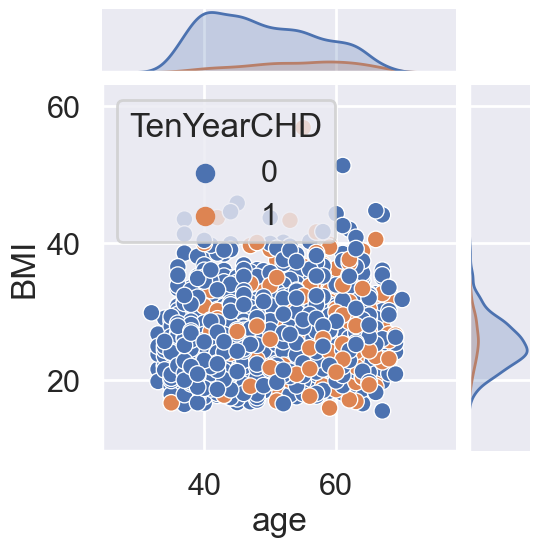

In [35]:
# jointplot for 'Age' vs 'BMI'
plt.figure(figsize=(20,20))
sns.jointplot(data=df,x='age',y='BMI',hue='TenYearCHD')

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from operator import add

def stacked_barchart(df, title=None, ylabel=None, xlabel=None):
    default_colors = ['#008080', '#5f3c41', '#219AD8']
    # From raw value to percentage
    totals = df.sum(axis=1)
    bars = ((df.T / totals) * 100).T
    r = list(range(df.index.size))

    # Plot
    barWidth = 0.95
    names = df.index.tolist()
    bottom = [0] * bars.shape[0]

    # Create bars
    color_index = 0
    plots = []
    for bar in bars.columns:
        plots.append(plt.bar(r, bars[bar], bottom=bottom, color=default_colors[color_index], edgecolor='white', width=barWidth))
        bottom = list(map(add, bottom, bars[bar]))
        color_index = 0 if color_index >= len(default_colors) else color_index + 1

    # Custom x axis
    plt.title(title)
    plt.xticks(r, names)
    plt.xlabel(df.index.name if xlabel is None else xlabel)
    plt.ylabel(df.columns.name if ylabel is None else ylabel)
    ax = plt.gca()

    y_labels = ax.get_yticks()
    ax.set_yticklabels([str(y) + '%' for y in y_labels])

    flat_list = [item for sublist in df.T.values for item in sublist]
    for i, d in zip(ax.patches, flat_list):
        data_label = str(d) + " (" + str(round(i.get_height(), 2)) + "%)"
        ax.text(i.get_x() + 0.45, i.get_y() + 5, data_label, horizontalalignment='center', verticalalignment='center', fontdict=dict(color='white', size=20))

    for item in ([ax.title]):
        item.set_fontsize(27)

    for item in ([ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(24)

    legend = ax.legend(plots, df.columns.tolist(), fancybox=True)
    plt.setp(legend.get_texts(), fontsize='20')

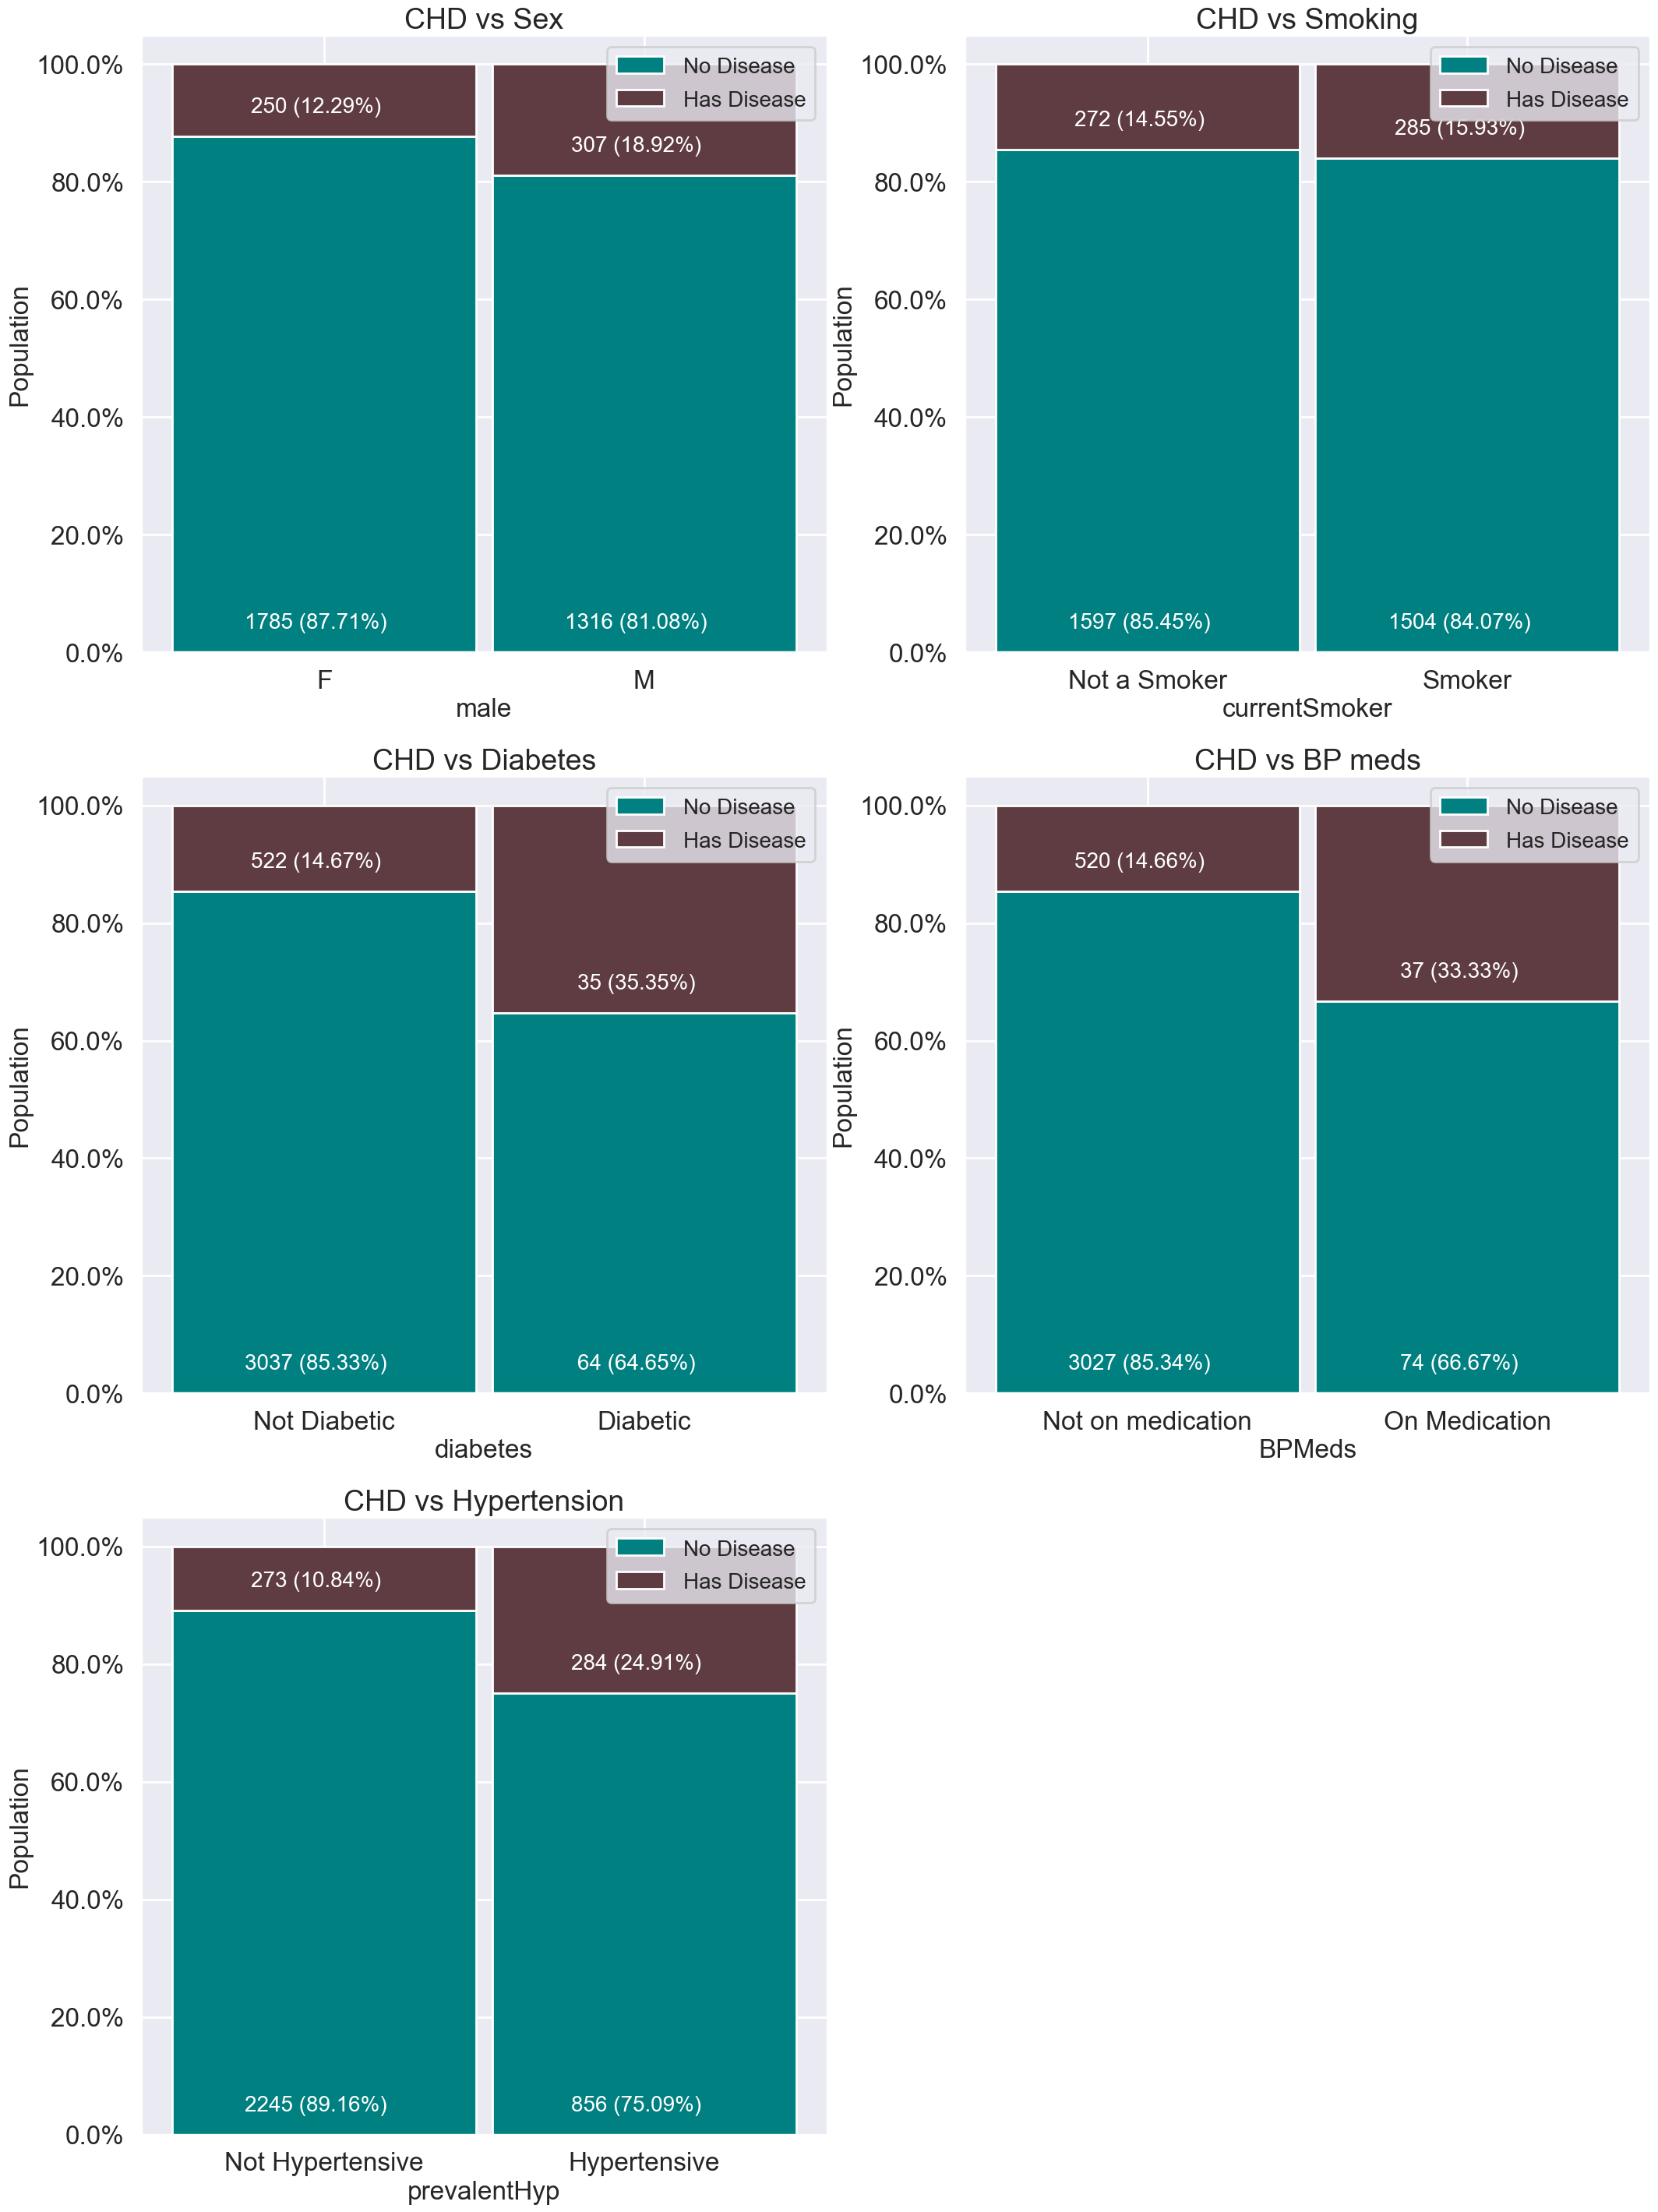

In [37]:
fig = plt.gcf()
fig.set_size_inches(25, 35)
grid_rows = 3
grid_cols = 2

# Draw sex vs disease outcome
plt.subplot(grid_rows, grid_cols, 1)
temp = df[['male', 'TenYearCHD']].groupby(['male', 'TenYearCHD']).size().unstack('TenYearCHD')
temp.rename(index={0: 'F', 1: 'M'}, columns={0: 'No Disease', 1: 'Has Disease'}, inplace=True)
stacked_barchart(temp, title='CHD vs Sex', ylabel='Population')

# Draw smoking status vs disease outcome
plt.subplot(grid_rows, grid_cols, 2)
temp = df[['currentSmoker', 'TenYearCHD']].groupby(['currentSmoker', 'TenYearCHD']).size().unstack('TenYearCHD')
temp.rename(index={0: 'Not a Smoker', 1: 'Smoker'}, columns={0: 'No Disease', 1: 'Has Disease'}, inplace=True)
stacked_barchart(temp, title='CHD vs Smoking', ylabel='Population')

# Draw diabetes vs disease outcome
plt.subplot(grid_rows, grid_cols, 3)
temp = df[['diabetes', 'TenYearCHD']].groupby(['diabetes', 'TenYearCHD']).size().unstack('TenYearCHD')
temp.rename(index={0: 'Not Diabetic', 1: 'Diabetic'}, columns={0: 'No Disease', 1: 'Has Disease'}, inplace=True)
stacked_barchart(temp, title='CHD vs Diabetes', ylabel='Population')

# Draw BP meds vs disease outcome
plt.subplot(grid_rows, grid_cols, 4)
temp = df[['BPMeds', 'TenYearCHD']].groupby(['BPMeds', 'TenYearCHD']).size().unstack('TenYearCHD')
temp.rename(index={0: 'Not on medication', 1: 'On Medication'}, columns={0: 'No Disease', 1: 'Has Disease'}, inplace=True)
stacked_barchart(temp, title='CHD vs BP meds', ylabel='Population')

# Draw Hypertension vs disease outcome
plt.subplot(grid_rows, grid_cols, 5)
temp = df[['prevalentHyp', 'TenYearCHD']].groupby(['prevalentHyp', 'TenYearCHD']).size().unstack('TenYearCHD')
temp.rename(index={0: 'Not Hypertensive', 1: 'Hypertensive'}, columns={0: 'No Disease', 1: 'Has Disease'}, inplace=True)
stacked_barchart(temp, title='CHD vs Hypertension', ylabel='Population')

plt.show()

**# Multivariant Analysis**

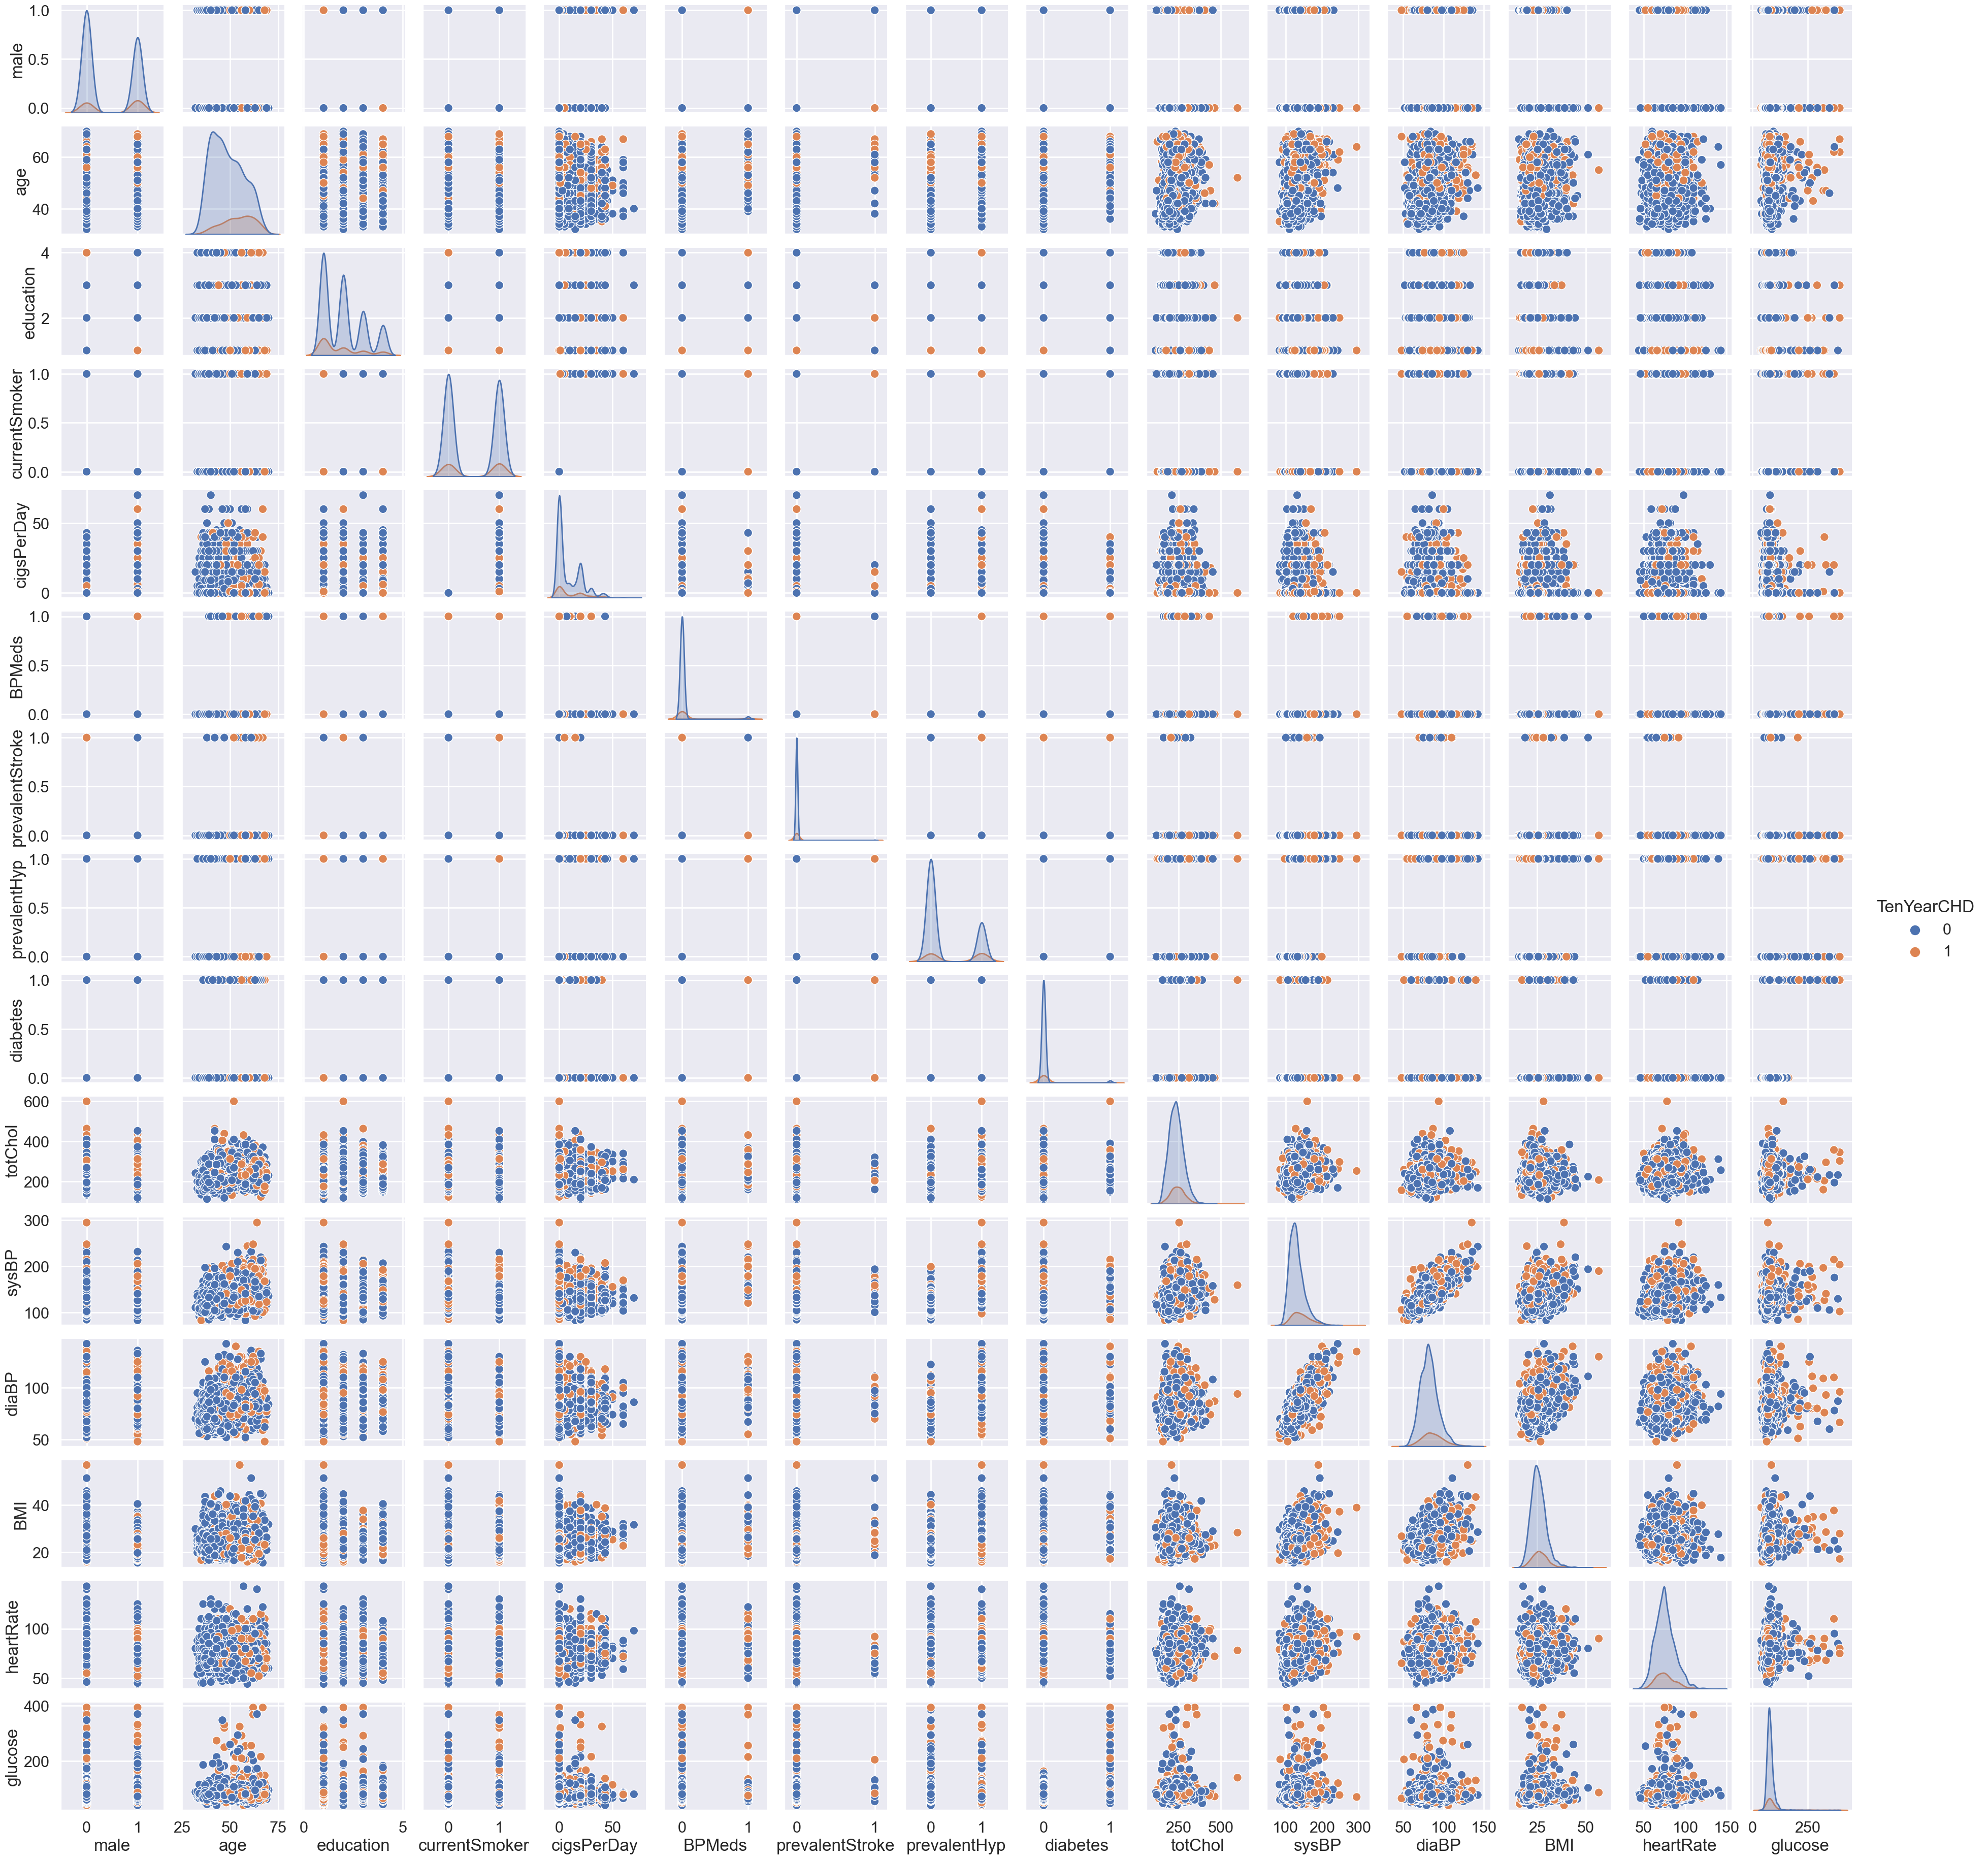

In [38]:
# make a pairplot for complete dataframe
sns.pairplot(df,hue='TenYearCHD')

# Statistics on the variables

In [39]:
df.describe()

male          age    education  currentSmoker   cigsPerDay  \
count  3658.000000  3658.000000  3658.000000    3658.000000  3658.000000   
mean      0.443685    49.551941     1.980317       0.489065     9.025424   
std       0.496886     8.562029     1.022656       0.499949    11.921590   
min       0.000000    32.000000     1.000000       0.000000     0.000000   
25%       0.000000    42.000000     1.000000       0.000000     0.000000   
50%       0.000000    49.000000     2.000000       0.000000     0.000000   
75%       1.000000    56.000000     3.000000       1.000000    20.000000   
max       1.000000    70.000000     4.000000       1.000000    70.000000   

            BPMeds  prevalentStroke  prevalentHyp     diabetes      totChol  \
count  3658.000000      3658.000000   3658.000000  3658.000000  3658.000000   
mean      0.030344         0.005741      0.311646     0.027064   236.847731   
std       0.171557         0.075561      0.463229     0.162292    44.097681   
min       0.000000         0.000000      0.000000     0.000000   113.000000   
25%       0.000000         0.000000      0.000000     0.000000   206.000000   
50%       0.000000         0.000000      0.000000     0.000000   234.000000   
75%       0.000000         0.000000      1.000000     0.000000   263.000000   
max       1.000000         1.000000      1.000000     1.000000   600.000000   

             sysBP        diaBP          BMI    heartRate      glucose  \
count  3658.000000  3658.000000  3658.000000  3658.000000  3658.000000   
mean    132.370558    82.917031    25.782802    75.730727    81.852925   
std      22.086866    11.974258     4.065601    11.981525    23.904164   
min      83.500000    48.000000    15.540000    44.000000    40.000000   
25%     117.000000    75.000000    23.080000    68.000000    71.000000   
50%     128.000000    82.000000    25.380000    75.000000    78.000000   
75%     143.875000    90.000000    28.037500    82.000000    87.000000   
max     295.000000   142.500000    56.800000   143.000000   394.000000   

        TenYearCHD  
count  3658.000000  
mean      0.152269  
std       0.359331  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000

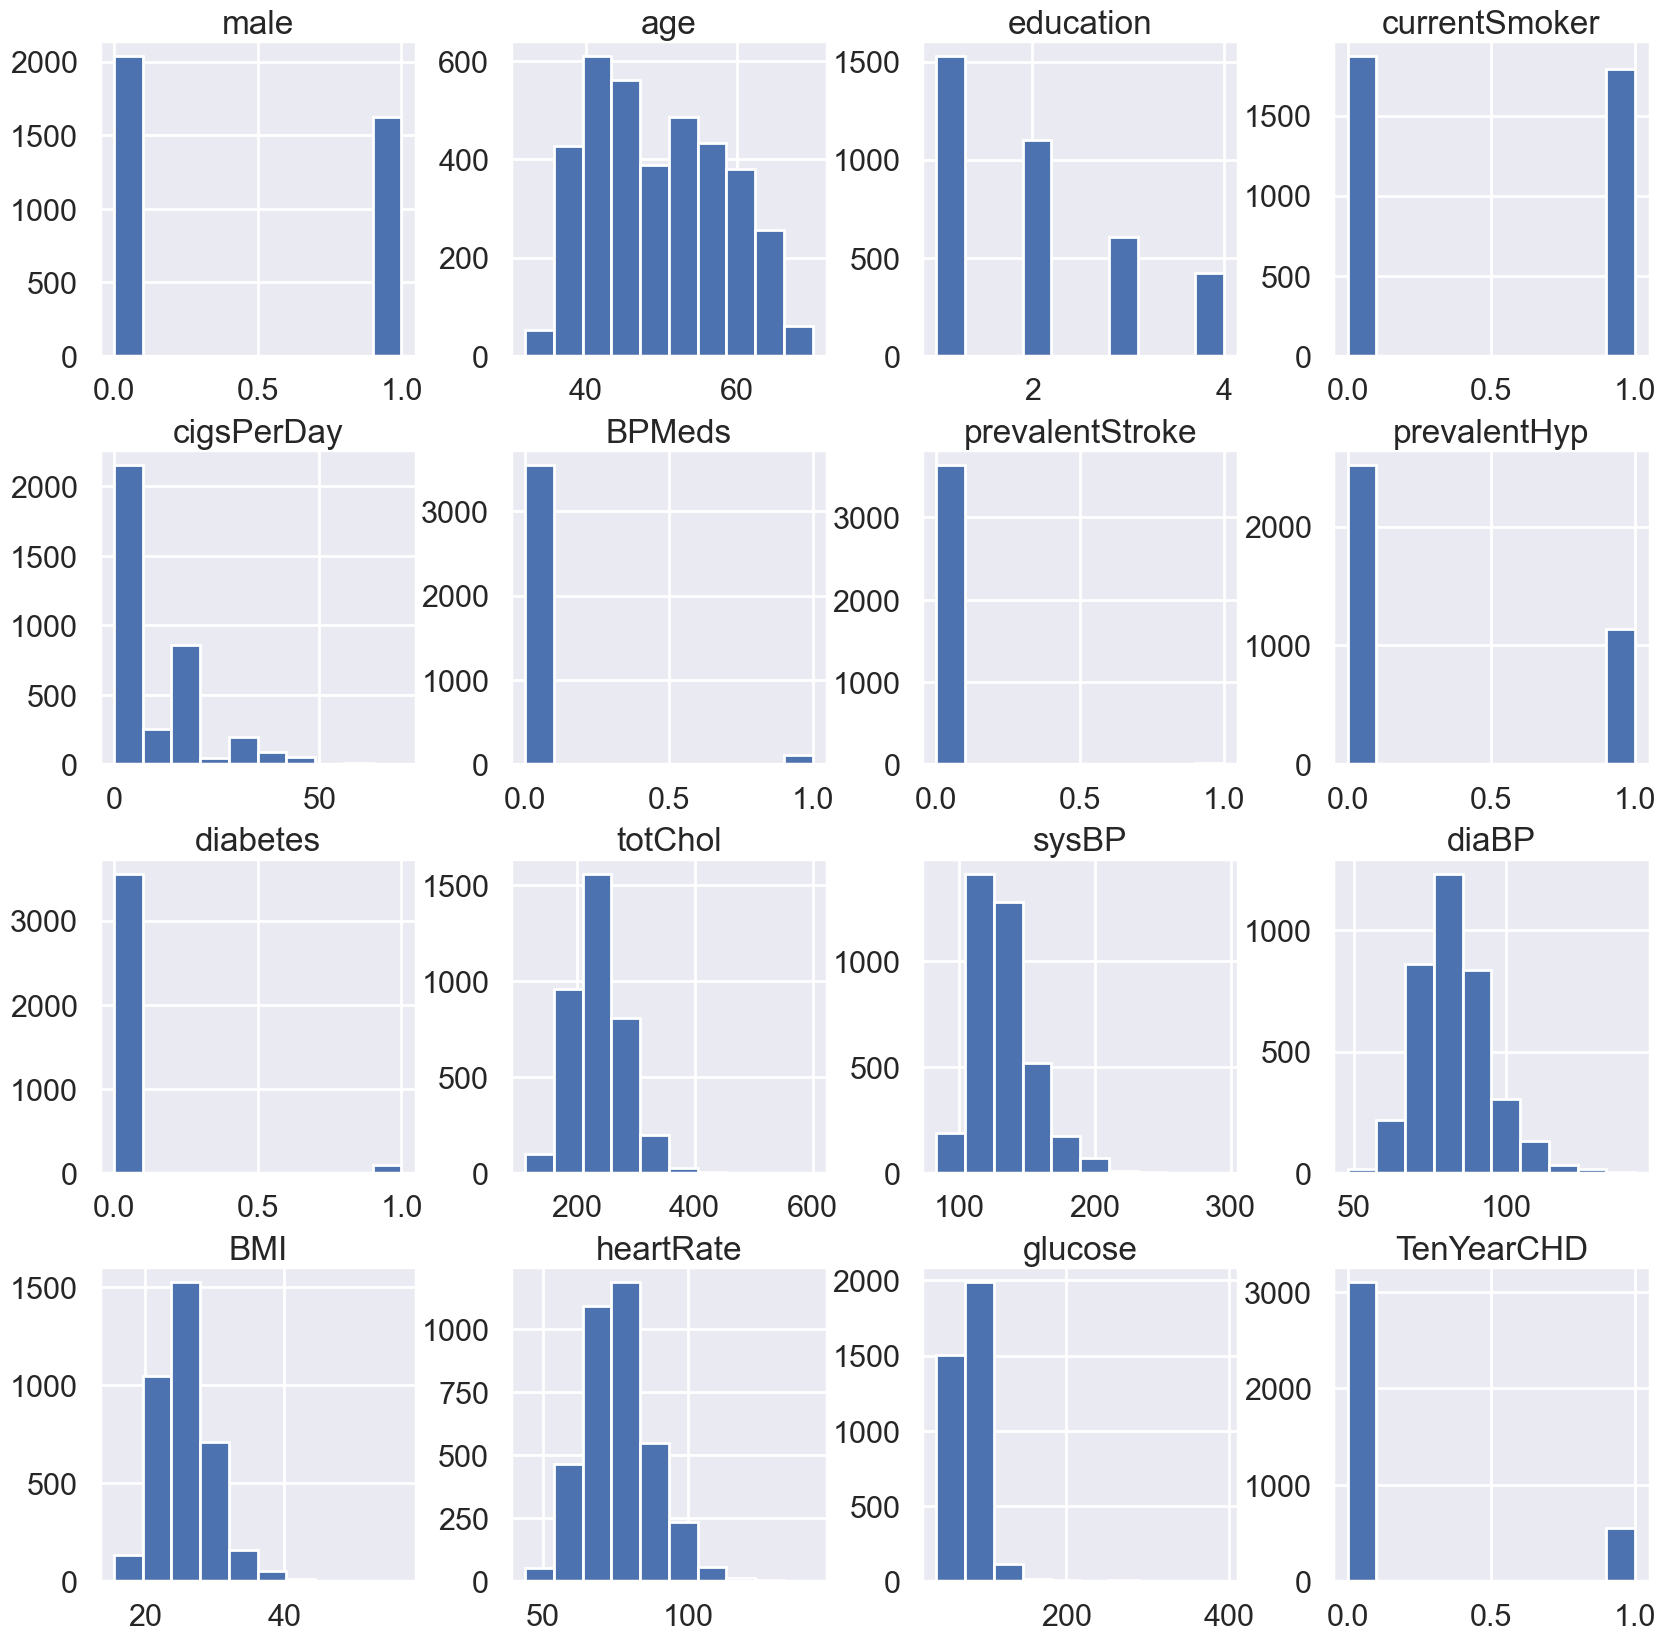

In [40]:
fig=plt.figure(figsize=(20,20))
ax=fig.gca()
df.hist(ax=ax);

- The study's participants have an average age of 49 years, with the youngest participant being 32 years old and the oldest reaching 70 years.
- Among the participants who smoke, the highest recorded number of cigarettes smoked is a remarkable 70.
- The mean BMI (Body Mass Index) is 25. It's worth noting that BMI levels above 25 but below 30 are typically categorized as overweight, while individuals with BMI values exceeding 30 are considered obese.
- The average glucose level is 81, which falls within the range of normal glucose levels, indicating a healthy distribution of glucose measurements among the study participants.

# Checking the target variable

In [41]:
df["TenYearCHD"].value_counts(normalize=True)

0    0.847731
1    0.152269
Name: TenYearCHD, dtype: float64

In [42]:
# 15% of the data indicative for positive disease in the near future

In [43]:
df.head()

male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2           0  
3           1  
4           0

# Hypothesis testing
Confidence interval

In [44]:
import scipy.stats as st

In [45]:
st.norm.interval(confidence=0.95,loc=np.mean(df['age']),scale=st.sem(df['age']))

(49.27447930494794, 49.829402597731125)

In [46]:
# Q-Q plot is also used to check the normal distribution

In [47]:
from statsmodels.graphics.gofplots import qqplot

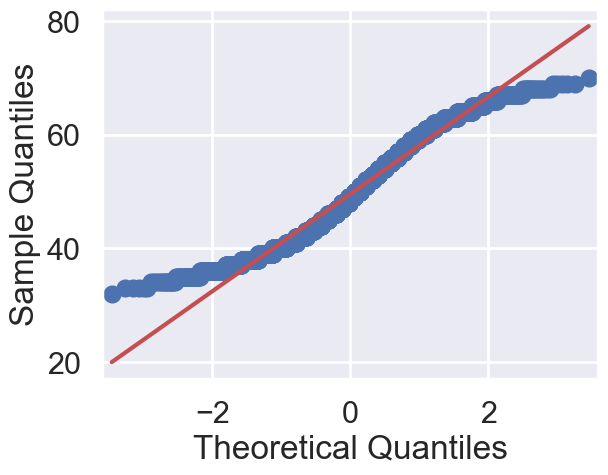

In [48]:
qqplot(df['age'],line="s")
plt.show()

<AxesSubplot:xlabel='age', ylabel='Count'>

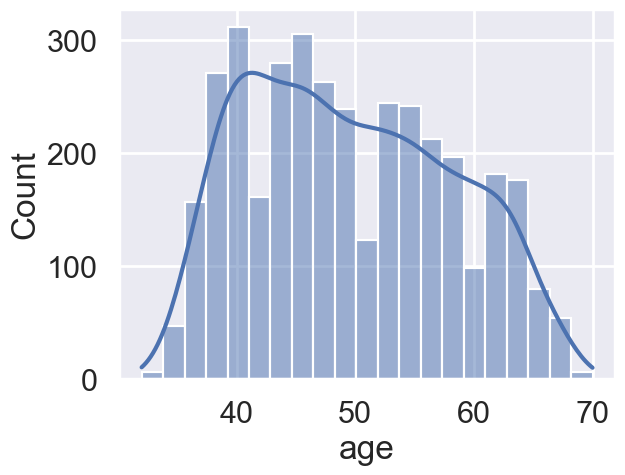

In [49]:
sns.histplot(x=df["age"],kde=True)

In [50]:
st.shapiro(df.age)

ShapiroResult(statistic=0.9664565920829773, pvalue=2.1781273409685848e-28)

In [51]:
# P value is less than 0.05 we are able to reject the null hypothesis

# H0: The age column is  normally distributed
# H1 : The age column is not normally distributed

In this case, we are accepting the alternative hypothesis.


## Mann-Whitney U test





The Mann-Whitney U test is a non-parametric statistical test used to determine whether there is a significant difference between two independent groups in a non-normally distributed data set. Here's how you can perform the Mann-Whitney U test in Python using the scipy library:



In [52]:
import scipy.stats as stats


# Perform the Mann-Whitney U test
statistic, p_value = stats.mannwhitneyu(df['sysBP'],df['diaBP'], alternative='two-sided')

# Display the test statistic and p-value
print("Mann-Whitney U Statistic:", statistic)
print("P-value:", p_value)

# Determine significance
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the two Features.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the two Features.")



Mann-Whitney U Statistic: 13227508.0
P-value: 0.0
Reject the null hypothesis: There is a significant difference between the two Features.


In [53]:
import scipy.stats as stats


# Perform the Mann-Whitney U test
statistic, p_value = stats.mannwhitneyu(df['glucose'],df['BMI'], alternative='two-sided')

# Display the test statistic and p-value
print("Mann-Whitney U Statistic:", statistic)
print("P-value:", p_value)

# Determine significance
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the two features.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the two features.")

Mann-Whitney U Statistic: 13380841.0
P-value: 0.0
Reject the null hypothesis: There is a significant difference between the two features.


# Encoding Technique

In [54]:
df.head()

male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2           0  
3           1  
4           0

In [55]:
df.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

# Feature Selection using Chi Square (Category)

It's important to note that the chi-square test is suitable for nominal data, which consists of categories with no inherent order. However, if you are working with ordinal data, where categories have a meaningful order, it may be more appropriate to explore other statistical tests such as the Mann-Whitney U test or the Kruskal-Wallis test for our analysis.

In [56]:
categorical_features=df[['male','currentSmoker','BPMeds','prevalentStroke','prevalentHyp','diabetes']]

In [57]:
categorical_features

male  currentSmoker  BPMeds  prevalentStroke  prevalentHyp  diabetes
0        1              0     0.0                0             0         0
1        0              0     0.0                0             0         0
2        1              1     0.0                0             0         0
3        0              1     0.0                0             1         0
4        0              1     0.0                0             0         0
...    ...            ...     ...              ...           ...       ...
4233     1              1     0.0                0             1         0
4234     1              1     0.0                0             0         0
4237     0              0     0.0                0             0         0
4238     1              0     0.0                0             1         0
4239     0              1     0.0                0             0         0

[3658 rows x 6 columns]

In [58]:
from sklearn.feature_selection import chi2
X = categorical_features
y = df['TenYearCHD']

In [59]:
chi_scores = chi2(X, y)

In [60]:
chi_scores

(array([17.10775088,  0.68647384, 28.19156867,  8.5078328 , 82.84545536,
        31.06762071]),
 array([3.53178759e-05, 4.07366355e-01, 1.09882183e-07, 3.53620967e-03,
        8.87260079e-20, 2.49193807e-08]))

<AxesSubplot:>

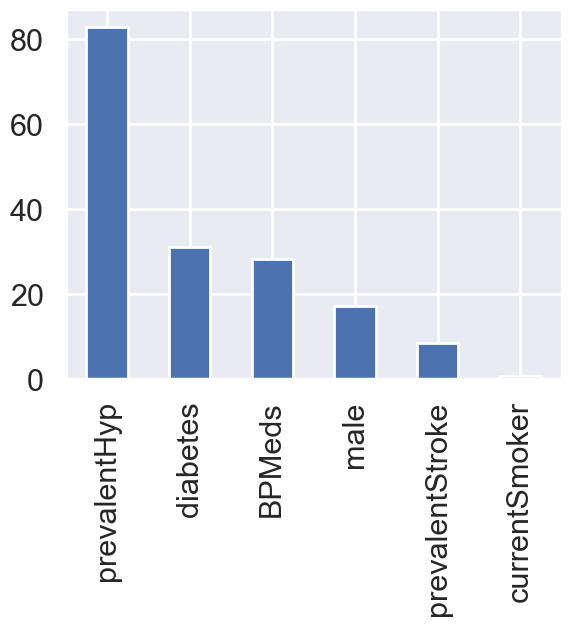

In [61]:
# higher the chi value, higher the importance
chi_values = pd.Series(chi_scores[0], index=X.columns)
chi_values.sort_values(ascending=False, inplace=True)
chi_values.plot.bar()

A high chi value means that there is a significant statistical relationship between the feature and the target variable.
Therefore we can include these features in out model.

<AxesSubplot:>

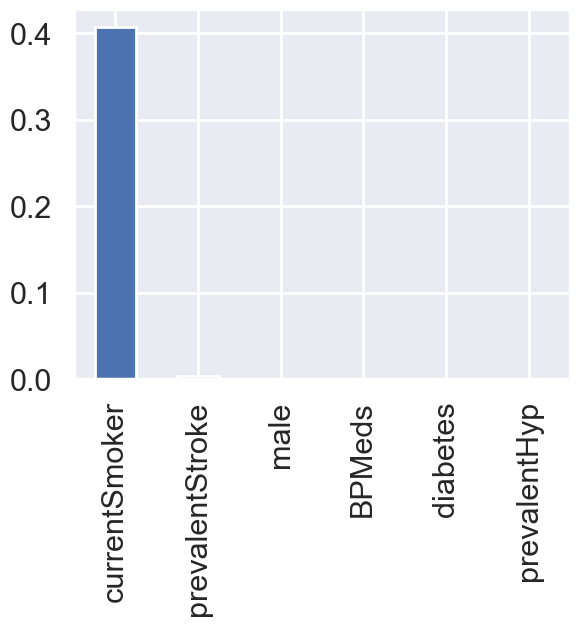

In [62]:
# if p-value > 0.05, lower the importance
p_values = pd.Series(chi_scores[1], index=X.columns)
p_values.sort_values(ascending=False, inplace=True)
p_values.plot.bar()



In chi-squared feature selection, a lower p-value indicates that there is a significant statistical relationship between the feature and the target variable.
A low p-value suggests that the feature is not independent of the target variable and that there is strong evidence of association.


In this dataset, the p-value for the 'currentSmoker' feature is greater than 0.05. Therefore, we fail to reject the null hypothesis, indicating that this feature is not statistically significant for our analysis.

In [63]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model=ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [64]:
print(model.feature_importances_)

[0.02011356 0.13110204 0.05156859 0.01600268 0.0515092  0.01001031
 0.00537694 0.02642871 0.0092744  0.11256752 0.12493518 0.11573428
 0.10918572 0.10023019 0.11596068]


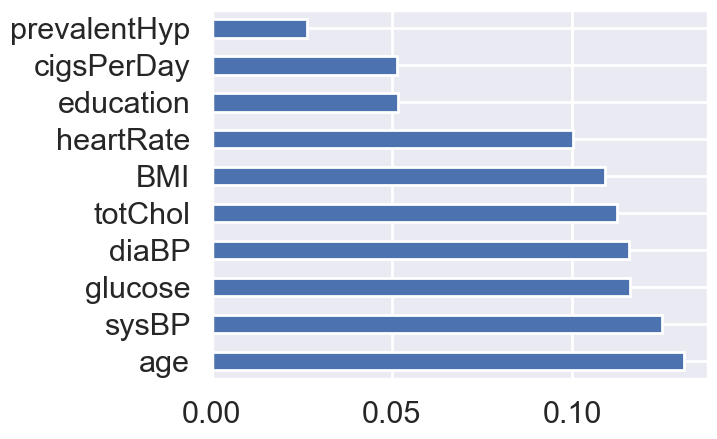

In [65]:
ranked_features=pd.Series(model.feature_importances_,index=X.columns)
ranked_features.nlargest(10).plot(kind='barh')
plt.show()

In [66]:
#Creating a dataset with only the features selected
data_features = df.drop(['currentSmoker'], axis=1)
data_features.head()

male  age  education  cigsPerDay  BPMeds  prevalentStroke  prevalentHyp  \
0     1   39        4.0         0.0     0.0                0             0   
1     0   46        2.0         0.0     0.0                0             0   
2     1   48        1.0        20.0     0.0                0             0   
3     0   61        3.0        30.0     0.0                0             1   
4     0   46        3.0        23.0     0.0                0             0   

   diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  TenYearCHD  
0         0    195.0  106.0   70.0  26.97       80.0     77.0           0  
1         0    250.0  121.0   81.0  28.73       95.0     76.0           0  
2         0    245.0  127.5   80.0  25.34       75.0     70.0           0  
3         0    225.0  150.0   95.0  28.58       65.0    103.0           1  
4         0    285.0  130.0   84.0  23.10       85.0     85.0           0

In [77]:
res =sm.Logit(y,X).fit()
res.summary()

NameError: name 'sm' is not defined

# Models and Predictions

Given that the dataset exhibits a significant class imbalance, with approximately six negative cases for every positive case, there is a risk of developing a classifier that is biased toward the negative class. Such a classifier may yield high accuracy but poor precision and recall. To mitigate this issue, we will balance the dataset using the Synthetic Minority Oversampling Technique (SMOTE). This technique involves generating synthetic samples for the minority class to achieve a more balanced distribution, which can improve the performance and fairness of our predictive model.



SMOTE (Synthetic Minority Oversampling Technique) follows a specific procedure to address class imbalance:

1. SMOTE begins by randomly selecting a minority class instance 'a' and identifies its 'k' nearest neighbors, which are also in the minority class.

2. A synthetic instance is then created by randomly choosing one of these 'k' nearest neighbors, denoted as 'b,' and connecting 'a' and 'b' to form a line segment within the feature space.

3. The synthetic instances are generated as a convex combination of the two chosen instances, 'a' and 'b.'

4. This process can be repeated as many times as needed to create synthetic examples for the minority class, effectively oversampling it.

It's worth noting that a common practice is to combine SMOTE with random undersampling to reduce the number of examples in the majority class. This two-step approach helps balance the class distribution and is particularly useful in addressing imbalanced datasets.

In [67]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter

In [68]:
X = data_features.iloc[:, 0:14]
y = data_features.iloc[:, 14]

In [69]:
X.head()

male  age  education  cigsPerDay  BPMeds  prevalentStroke  prevalentHyp  \
0     1   39        4.0         0.0     0.0                0             0   
1     0   46        2.0         0.0     0.0                0             0   
2     1   48        1.0        20.0     0.0                0             0   
3     0   61        3.0        30.0     0.0                0             1   
4     0   46        3.0        23.0     0.0                0             0   

   diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  
0         0    195.0  106.0   70.0  26.97       80.0     77.0  
1         0    250.0  121.0   81.0  28.73       95.0     76.0  
2         0    245.0  127.5   80.0  25.34       75.0     70.0  
3         0    225.0  150.0   95.0  28.58       65.0    103.0  
4         0    285.0  130.0   84.0  23.10       85.0     85.0

In [70]:
y.head()

0    0
1    0
2    0
3    1
4    0
Name: TenYearCHD, dtype: int64

In [71]:
# The numbers before SMOTE
num_before = dict(Counter(y))

# Perform SMOTE
# Define Pipeline
over=SMOTE(sampling_strategy=0.8)
under=RandomUnderSampler(sampling_strategy=0.8)
steps=[("o",over),("u",under)]
pipeline = Pipeline(steps=steps)

# Transform the dataset
X_smote,y_smote=pipeline.fit_resample(X,y)

# The numbers after SMOTE
num_after=dict(Counter(y_smote))

In [72]:
print(num_before,num_after)

{0: 3101, 1: 557} {0: 3100, 1: 2480}


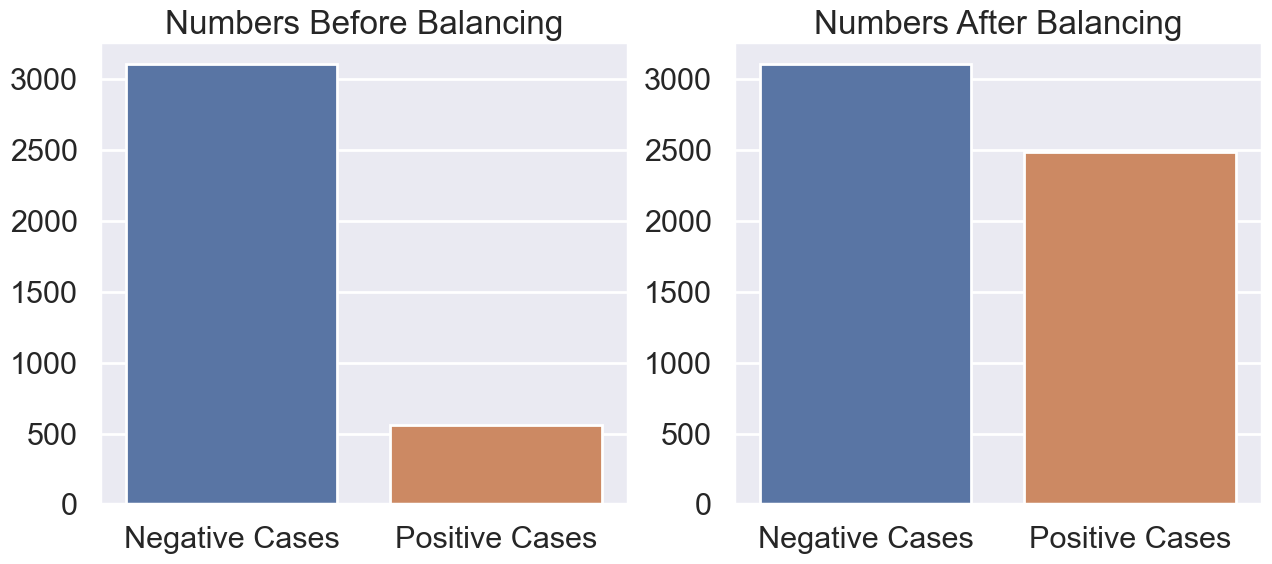

In [73]:
labels = ["Negative Cases","Positive Cases"]
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.barplot(x=labels, y=list(num_before.values()))
plt.title("Numbers Before Balancing")
plt.subplot(1,2,2)
sns.barplot(x=labels, y=list(num_after.values()))
plt.title("Numbers After Balancing")
plt.show()

Following the application of SMOTE, the dataset has been substantially balanced. The new ratio between negative and positive cases now stands at approximately 1:1.2, which is a significant improvement compared to the original imbalance of 1:5.57. This balancing of the dataset enhances our ability to develop and evaluate predictive models, ensuring that both positive and negative cases are adequately represented in the data.

# Splitting data to Training and Testing set

In [74]:
data_features.columns

Index(['male', 'age', 'education', 'cigsPerDay', 'BPMeds', 'prevalentStroke',
       'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI',
       'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [75]:
# new dataset
new_data = pd.concat([pd.DataFrame(X_smote), pd.DataFrame(y_smote)], axis=1)
new_data.columns = ['male','age' ,'eduaction', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp',
'diabetes', 'totChol', 'sysBP', 'diaBP','BMI', 'heartRate', 'glucose', 'TenYearCHD']
new_data.head()

male  age  eduaction  cigsPerDay  BPMeds  prevalentStroke  prevalentHyp  \
1698     1   45        3.0        30.0     0.0                0             0   
3623     0   38        2.0         0.0     0.0                0             0   
1693     0   43        3.0         8.0     0.0                0             0   
3490     0   48        3.0         0.0     0.0                0             0   
1465     0   51        1.0         0.0     0.0                0             0   

      diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  TenYearCHD  
1698         0    250.0  126.0   89.5  28.68       75.0     92.0           0  
3623         0    169.0  115.0   60.0  26.87       65.0     60.0           0  
1693         0    192.0  119.5   69.5  24.67       90.0     83.0           0  
3490         0    193.0  127.0   81.0  25.85       58.0     70.0           0  
1465         0    226.0  131.0   87.0  24.36       75.0     73.0           0

In [76]:
X_new = new_data.iloc[:, 0:14]
y_new= new_data.iloc[:,-1]
X_new.head()

male  age  eduaction  cigsPerDay  BPMeds  prevalentStroke  prevalentHyp  \
1698     1   45        3.0        30.0     0.0                0             0   
3623     0   38        2.0         0.0     0.0                0             0   
1693     0   43        3.0         8.0     0.0                0             0   
3490     0   48        3.0         0.0     0.0                0             0   
1465     0   51        1.0         0.0     0.0                0             0   

      diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  
1698         0    250.0  126.0   89.5  28.68       75.0     92.0  
3623         0    169.0  115.0   60.0  26.87       65.0     60.0  
1693         0    192.0  119.5   69.5  24.67       90.0     83.0  
3490         0    193.0  127.0   81.0  25.85       58.0     70.0  
1465         0    226.0  131.0   87.0  24.36       75.0     73.0

In [77]:
y_new.head()

1698    0
3623    0
1693    0
3490    0
1465    0
Name: TenYearCHD, dtype: int64

In [78]:
# split the dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_new,y_new,test_size=.2,random_state=42)

# Feature Scaling

Feature scaling is a technique employed to standardize the range of independent variables or features within a dataset. The primary goal is to bring all features to a common scale or range. This process often results in faster execution times for various algorithms and enhances the performance of machine learning models.

In [79]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [80]:
X_train_scaled=scaler.fit_transform(X_train)
X_train=pd.DataFrame(X_train_scaled)

X_test_scaled=scaler.transform(X_test)
X_test=pd.DataFrame(X_test_scaled)

# Models

The five algorithms that will be used are:
1. Logistic Regression
2. k-Nearest Neighbours
3. Decision Trees
4. Support Vector Machine
5.Random Forest Classifier

In [81]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score,precision_score,classification_report,roc_auc_score,roc_curve

# Logistic regression

The goal of logistic regression is to find the best fitting (yet biologically reasonable) model to describe the relationship between the dichotomous characteristic of interest (dependent variable = response or outcome variable) and a set of independent (predictor or explanatory) variables. Logistic regression generates the coefficients (and its standard errors and significance levels) of a formula to predict a logit transformation of the probability of presence of the characteristic of interest: logit function

Rather than choosing parameters that minimize the sum of squared errors (like in ordinary regression), estimation in logistic regression chooses parameters that maximize the likelihood of observing the sample values.

In [82]:
from sklearn.linear_model import LogisticRegression

In [83]:
# search for optimun parameters using gridsearch
params = {'penalty':['l1','l2'],
         'C':[0.01,0.1,1,10,100],
         'class_weight':['balanced',None]}
logistic_clf = GridSearchCV(LogisticRegression(),param_grid=params,cv=10)

In [84]:
#train the classifier
logistic_clf.fit(X_train,y_train)

logistic_clf.best_params_

{'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l2'}

In [85]:
# make predictions
logistic_predict = logistic_clf.predict(X_test)

In [86]:
log_accuracy = accuracy_score(y_test,logistic_predict)
print(f"Using logistic regression we get an accuracy of {round(log_accuracy*100,2)}%")

Using logistic regression we get an accuracy of 64.61%


<AxesSubplot:>

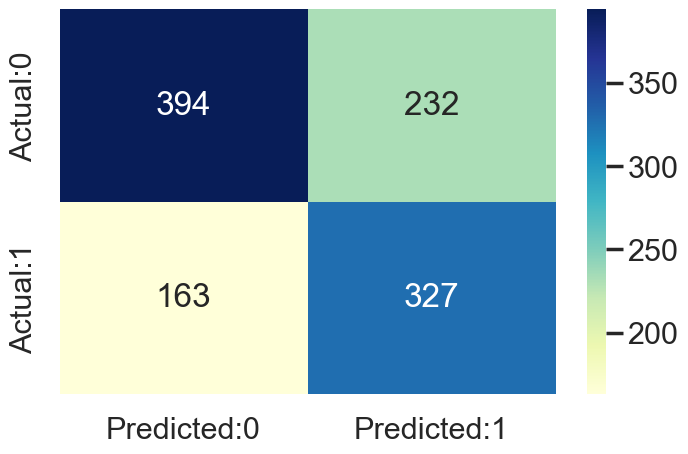

In [87]:
cm=confusion_matrix(y_test,logistic_predict)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [88]:
print(classification_report(y_test,logistic_predict))

              precision    recall  f1-score   support

           0       0.71      0.63      0.67       626
           1       0.58      0.67      0.62       490

    accuracy                           0.65      1116
   macro avg       0.65      0.65      0.64      1116
weighted avg       0.65      0.65      0.65      1116



In [89]:
logistic_f1 = f1_score(y_test, logistic_predict)
print(f'The f1 score for logistic regression is {round(logistic_f1*100,2)}%')

The f1 score for logistic regression is 62.35%


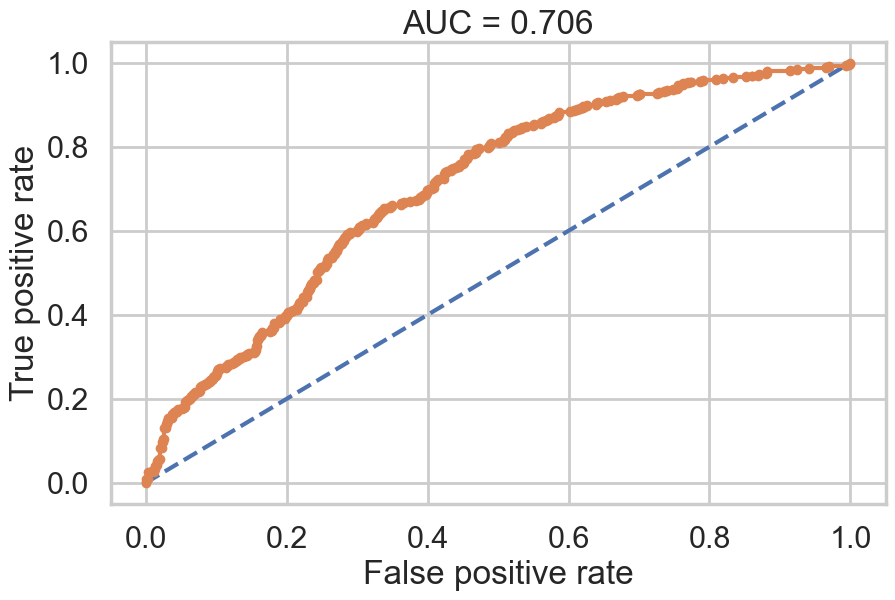

In [90]:
# ROC curve and AUC
probs = logistic_clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
log_auc = roc_auc_score(y_test, probs)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(log_auc,3)}")
plt.show()

# K-Nearest Neighbours

The k-nearest-neighbors is a data classification algorithm that attempts to determine what group a data point is in by looking at the data points around it.

An algorithm, looking at one point on a grid, trying to determine if a point is in group A or B, looks at the states of the points that are near it. The range is arbitrarily determined, but the point is to take a sample of the data. If the majority of the points are in group A, then it is likely that the data point in question will be A rather than B, and vice versa.

The k-nearest-neighbor is an example of a "lazy learner" algorithm because it does not generate a model of the data set beforehand. The only calculations it makes are when it is asked to poll the data point's neighbors. This makes k-nn very easy to implement for data mining.

In [91]:
from sklearn.neighbors import KNeighborsClassifier

In [92]:
# search for optimun parameters using gridsearch
params= {'n_neighbors': np.arange(1, 10)}
grid_search = GridSearchCV(estimator = KNeighborsClassifier(), param_grid = params,
                           scoring = 'accuracy', cv = 10, n_jobs = -1)
knn_clf = GridSearchCV(KNeighborsClassifier(),params,cv=3, n_jobs=-1)

In [93]:
# train the model
knn_clf.fit(X_train,y_train)
knn_clf.best_params_

{'n_neighbors': 1}

In [94]:
# predictions
knn_predict = knn_clf.predict(X_test)

In [95]:
#accuracy
knn_accuracy = accuracy_score(y_test,knn_predict)
print(f"Using k-nearest neighbours we get an accuracy of {round(knn_accuracy*100,2)}%")

Using k-nearest neighbours we get an accuracy of 78.58%


<AxesSubplot:>

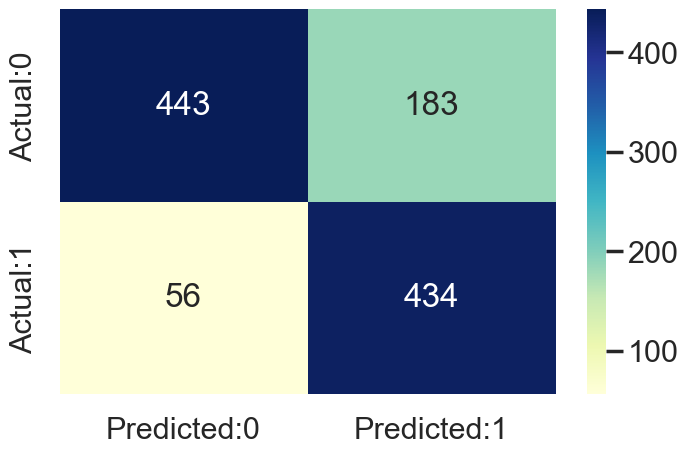

In [96]:
cm=confusion_matrix(y_test,knn_predict)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [97]:
print(classification_report(y_test,knn_predict))

              precision    recall  f1-score   support

           0       0.89      0.71      0.79       626
           1       0.70      0.89      0.78       490

    accuracy                           0.79      1116
   macro avg       0.80      0.80      0.79      1116
weighted avg       0.81      0.79      0.79      1116



In [98]:
knn_f1 = f1_score(y_test, knn_predict)
print(f'The f1 score for K nearest neignbours is {round(knn_f1*100,2)}%')

The f1 score for K nearest neignbours is 78.41%


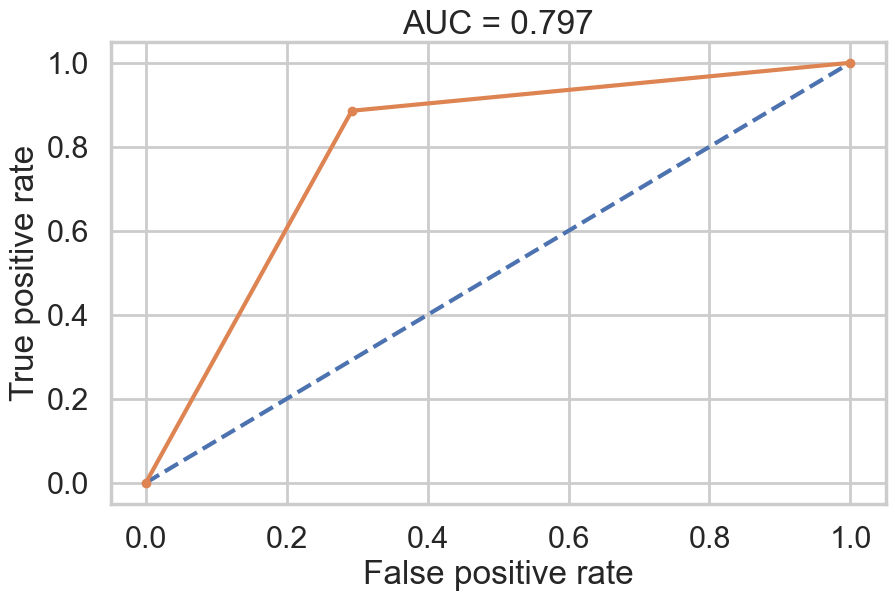

In [99]:
# ROC curve and AUC
probs = knn_clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
knn_auc = roc_auc_score(y_test, probs)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(knn_auc,3)}")
plt.show()

# Decision Trees

A decision tree is a tree-like graph with nodes representing the place where we pick an attribute and ask a question; edges represent the answers the to the question; and the leaves represent the actual output or class label. They are used in non-linear decision making with simple linear decision surface.

Decision trees classify the examples by sorting them down the tree from the root to some leaf node, with the leaf node providing the classification to the example. Each node in the tree acts as a test case for some attribute, and each edge descending from that node corresponds to one of the possible answers to the test case. This process is recursive in nature and is repeated for every subtree rooted at the new nodes.

In [100]:
from sklearn.tree import DecisionTreeClassifier
dtree= DecisionTreeClassifier(random_state=7)

In [101]:
# grid search for optimum parameters
params = {'max_features': ['auto', 'sqrt', 'log2'],
          'min_samples_split': [2,3,4,5,6,7,8,9,10,11,12,13,14,15],
          'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10,11]}
tree_clf = GridSearchCV(dtree, param_grid=params, n_jobs=-1)

In [102]:
# train the model
tree_clf.fit(X_train,y_train)
tree_clf.best_params_

{'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 10}

In [103]:
# predictions
tree_predict = tree_clf.predict(X_test)

In [104]:
#accuracy
tree_accuracy = accuracy_score(y_test,tree_predict)
print(f"Using Decision Trees we get an accuracy of {round(tree_accuracy*100,2)}%")

Using Decision Trees we get an accuracy of 73.48%


<AxesSubplot:>

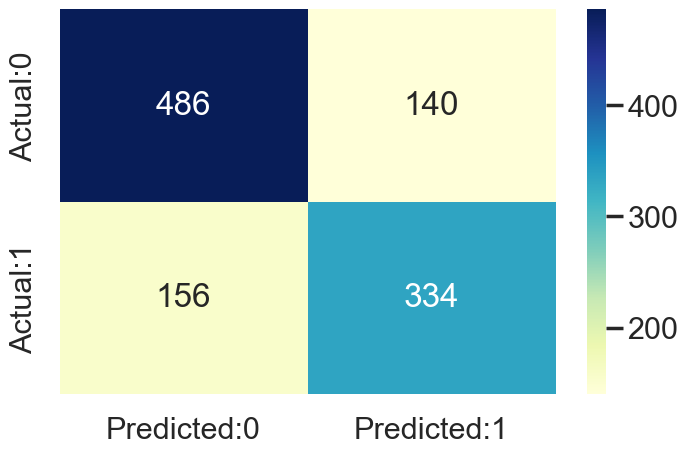

In [105]:
cm=confusion_matrix(y_test,tree_predict)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [106]:
print(classification_report(y_test,tree_predict))

              precision    recall  f1-score   support

           0       0.76      0.78      0.77       626
           1       0.70      0.68      0.69       490

    accuracy                           0.73      1116
   macro avg       0.73      0.73      0.73      1116
weighted avg       0.73      0.73      0.73      1116



In [107]:
tree_f1 = f1_score(y_test, tree_predict)
print(f'The f1 score Descision trees is {round(tree_f1*100,2)}%')

The f1 score Descision trees is 69.29%


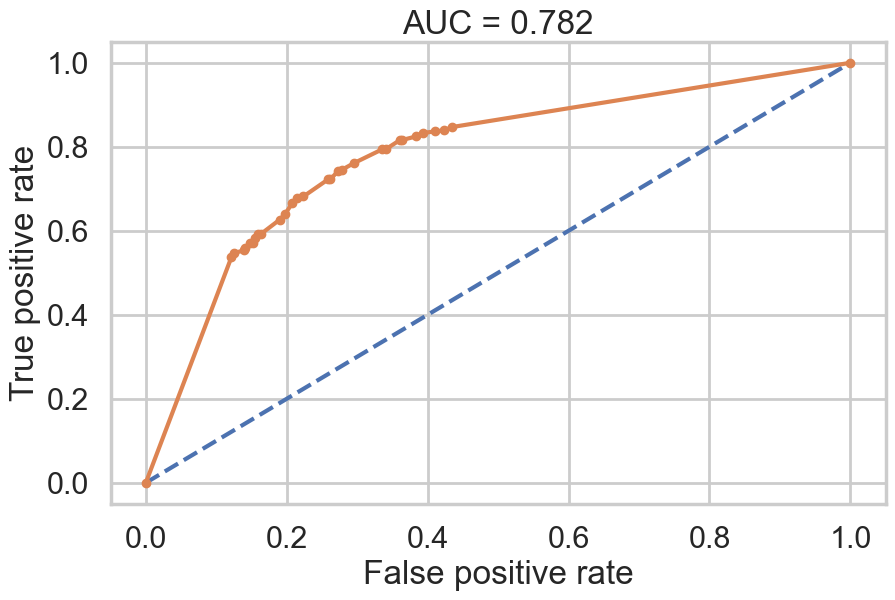

In [108]:
# ROC curve and AUC
probs = tree_clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
tree_auc = roc_auc_score(y_test, probs)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(tree_auc,3)}")
plt.show()

# Support Vector Machine

A Support Vector Machine (SVM) is a discriminative classifier formally defined by a separating hyperplane. In other words, given labeled training data (supervised learning), the algorithm outputs an optimal hyperplane which categorizes new examples. In two dimentional space this hyperplane is a line dividing a plane in two parts where in each class lay in either side.

In [122]:
from sklearn.svm import SVC

In [123]:
#grid search for optimum parameters
Cs = [0.1, 1, 10]
gammas = [0.1, 1]
param_grid = {'C': Cs, 'gamma' : gammas}
svm_clf = GridSearchCV(SVC(kernel='rbf', probability=True), param_grid, cv=10)

In [124]:
# train the model
svm_clf.fit(X_train,y_train)
svm_clf.best_params_

{'C': 10, 'gamma': 1}

In [125]:
# predictions
svm_predict = svm_clf.predict(X_test)

In [126]:
#accuracy
svm_accuracy = accuracy_score(y_test,svm_predict)
print(f"Using SVM we get an accuracy of {round(svm_accuracy*100,2)}%")

Using SVM we get an accuracy of 84.68%


<AxesSubplot:>

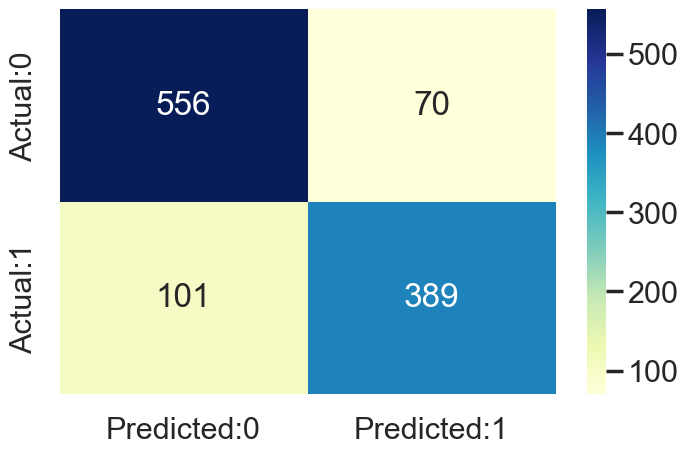

In [127]:
cm=confusion_matrix(y_test,svm_predict)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [128]:
print(classification_report(y_test,svm_predict))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87       626
           1       0.85      0.79      0.82       490

    accuracy                           0.85      1116
   macro avg       0.85      0.84      0.84      1116
weighted avg       0.85      0.85      0.85      1116



In [129]:
svm_f1 = f1_score(y_test, svm_predict)
print(f'The f1 score for SVM is {round(svm_f1*100,2)}%')

The f1 score for SVM is 81.98%


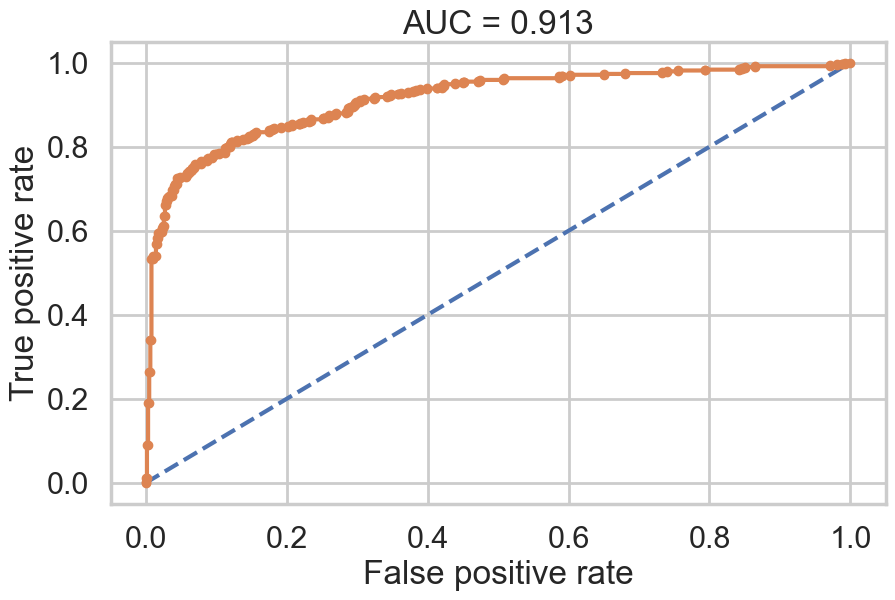

In [130]:
# ROC curve and AUC
probs = svm_clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
svm_auc = roc_auc_score(y_test, probs)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(svm_auc,3)}")
plt.show()

# Random Forest Classifier

In [112]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}


In [113]:
# Instantiate the RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

In [114]:
# Grid Search
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]})

In [115]:
# Access the best hyperparameters
best_params = grid_search.best_params_

In [116]:
# predictions
rf_predict = grid_search.predict(X_test)

In [117]:
#accuracy
rf_accuracy = accuracy_score(y_test,rf_predict)
print(f"Using random forest we get an accuracy of {round(rf_accuracy*100,2)}%")

Using random forest we get an accuracy of 88.8%


<AxesSubplot:>

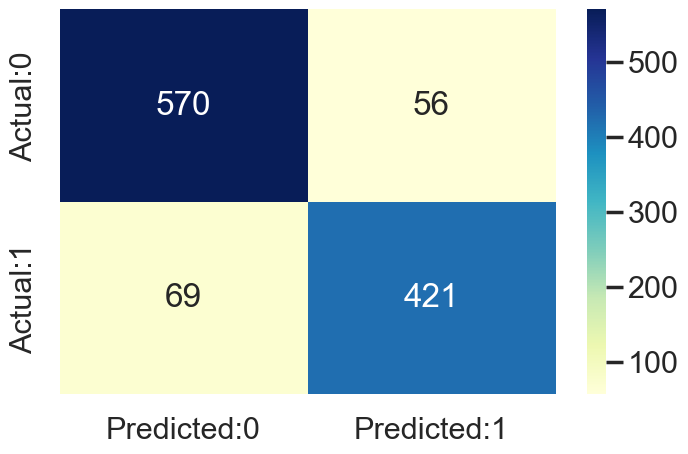

In [118]:
cm=confusion_matrix(y_test,rf_predict)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [119]:
print(classification_report(y_test,rf_predict))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90       626
           1       0.88      0.86      0.87       490

    accuracy                           0.89      1116
   macro avg       0.89      0.88      0.89      1116
weighted avg       0.89      0.89      0.89      1116



In [120]:
rf_f1 = f1_score(y_test, rf_predict)
print(f'The f1 score for RFC is {round(rf_f1*100,2)}%')

The f1 score for RFC is 87.07%


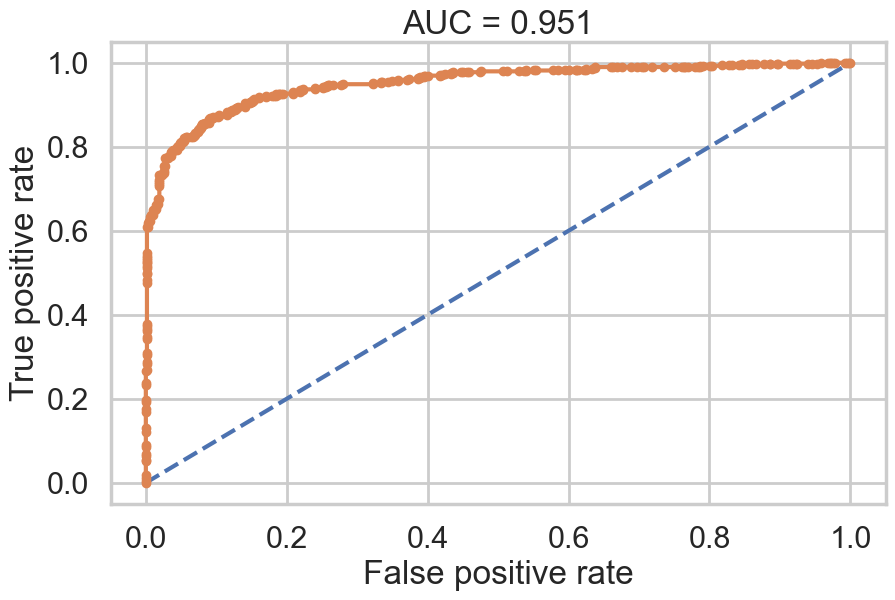

In [121]:
# ROC curve and AUC
probs = grid_search.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
rf_auc = roc_auc_score(y_test, probs)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(rf_auc,3)}")
plt.show()

# Model Comparison

In [131]:
comparison = pd.DataFrame({
    "Logistic regression":{'Accuracy':log_accuracy, 'AUC':log_auc, 'F1 score':logistic_f1},
    "K-nearest neighbours":{'Accuracy':knn_accuracy, 'AUC':knn_auc, 'F1 score':knn_f1},
    "Decision trees":{'Accuracy':tree_accuracy, 'AUC':tree_auc, 'F1 score':tree_f1},
    "Support vector machine":{'Accuracy':svm_accuracy, 'AUC':svm_auc, 'F1 score':svm_f1},
    "Random Forest Classifier":{'Accuracy':rf_accuracy, 'AUC':rf_auc, 'F1 score':rf_f1},
}).T

In [132]:
comparison

Accuracy       AUC  F1 score
Logistic regression       0.646057  0.705523  0.623451
K-nearest neighbours      0.785842  0.796691  0.784101
Decision trees            0.734767  0.781501  0.692946
Support vector machine    0.846774  0.912581  0.819810
Random Forest Classifier  0.887993  0.950628  0.870734

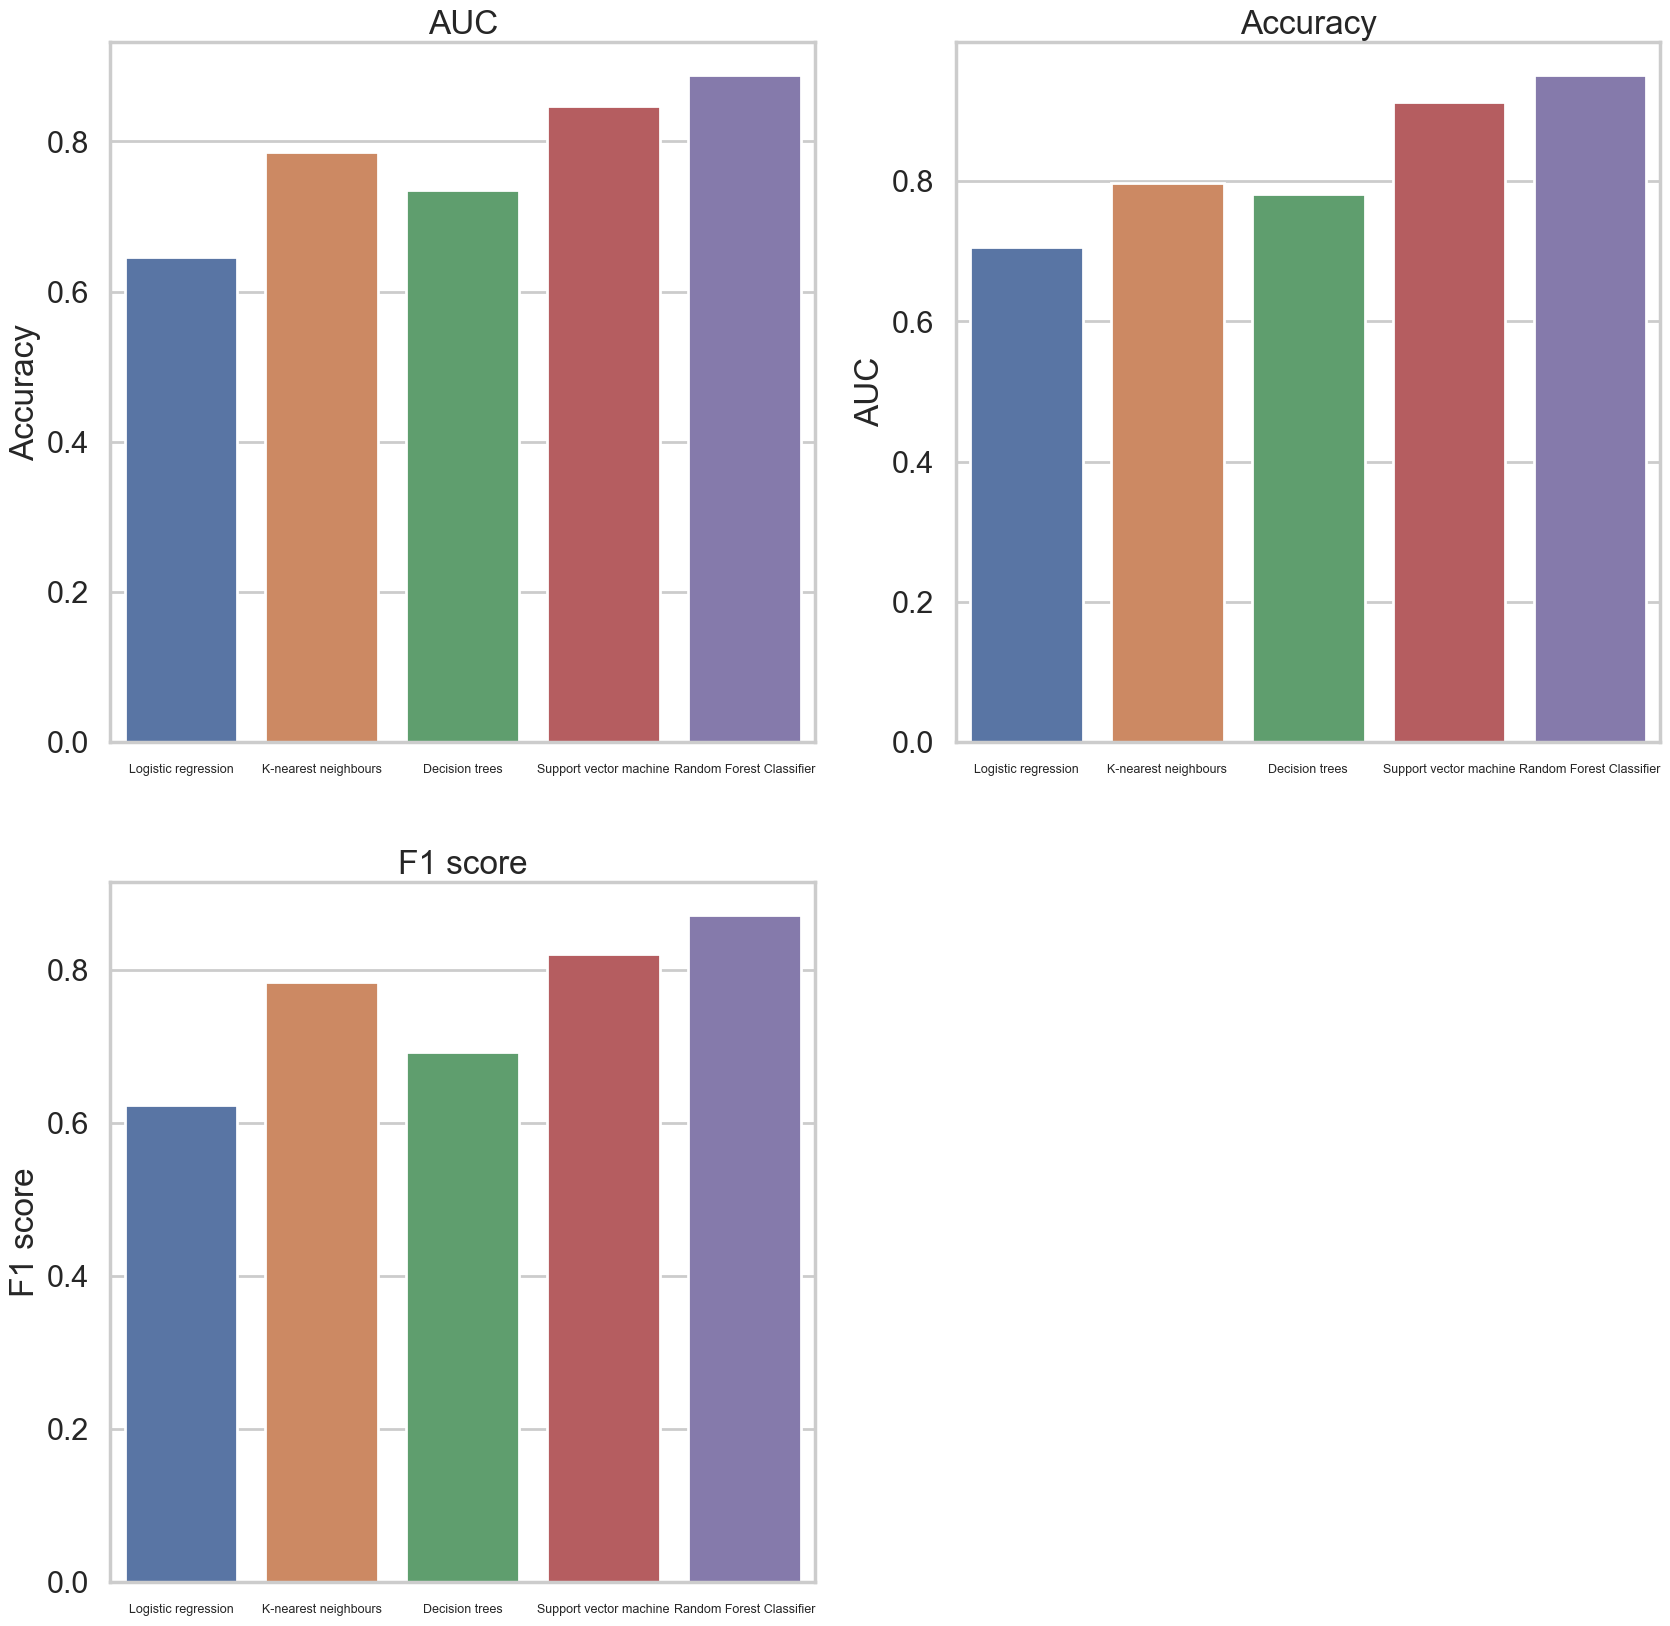

In [133]:
fig = plt.gcf()
fig.set_size_inches(20, 20)
titles = ['AUC','Accuracy','F1 score']
for title,label in enumerate(comparison.columns):
    plt.subplot(2,2,title+1)
    sns.barplot(x=comparison.index, y = comparison[label], data=comparison)
    plt.xticks(fontsize=9)
    plt.title(titles[title])
plt.show()

# insights

1. The pivotal predictors for estimating the ten-year risk of developing Coronary Heart Disease (CHD) were identified as age and systolic blood pressure, signifying their significant role in the predictive model.

2. Among the various machine learning models assessed, the Random Forest Classifier emerged as the top-performing model in terms of both accuracy and the F1 score. Its noteworthy high Area Under the Curve (AUC) underscores its robust true positive rate, making it a favorable choice for this task.

3. The implementation of the Synthetic Minority Oversampling Technique (SMOTE) to balance the dataset yielded notable improvements in the models' sensitivity. This improvement was observed when comparing the performance metrics with those of other models evaluated in separate analyses on the same dataset.

4. It's important to note that, with a larger dataset, particularly an increase in data points for the minority class, the potential for building even more effective models becomes apparent. The availability of additional data can lead to improved model performance and predictive accuracy.


# Conclusion:

In this healthcare-focused project, we harnessed the power of machine learning to extract meaningful insights from medical data. Our primary objective was to develop a predictive model that could assist in health-related decision-making.

After rigorous experimentation with multiple machine learning algorithms, the Random Forest Classifier (RFC) emerged as the standout performer. It achieved an accuracy rate of 87.91%. This signifies that RFC excels in accurately identifying health outcomes, which is crucial for medical professionals and patients alike.

These findings hold immense promise for the healthcare domain. The ability to predict health outcomes with such precision can revolutionize patient care, leading to earlier disease detection, tailored treatment plans, and optimized healthcare resource allocation. It empowers medical practitioners with data-driven insights to make informed decisions, ultimately improving patient well-being.

Beyond healthcare, this project underscores the transformative potential of machine learning across various sectors. By harnessing data, we can drive innovation, enhance decision-making, and contribute to a brighter, healthier future for all.


# Conclusion (Statistical Perspective):

In this healthcare-focused project, we not only developed predictive models but also conducted rigorous statistical analyses to ensure the reliability of our findings. To achieve this, we employed two essential statistical tests: the Chi-square test and the Mann-Whitney U test.

# Chi-square Test:
The Chi-square test played a crucial role in evaluating the relationship between categorical variables in our dataset. By applying this test, we gained insights into the interdependencies within the data. This was especially valuable in understanding factors such as gender distribution and how they might correlate with health outcomes.

# Mann-Whitney U Test:
The Mann-Whitney U test, on the other hand, was instrumental when dealing with continuous or ordinal variables. It allowed us to assess whether there were statistically significant differences between two independent groups. For instance, it helped us examine how age or other continuous variables might impact health-related predictions.

# The necessity of employing these tests was twofold:

# Statistical Rigor:
In the realm of healthcare, statistical rigor is paramount. By applying these tests, we ensured that our findings were not merely based on chance but had strong statistical significance.

# Deeper Insights:
These tests allowed us to delve deeper into the data. We didn't stop at developing predictive models; we aimed to understand the underlying statistical relationships. This not only bolsters the credibility of our predictions but also provides valuable insights for healthcare practitioners and policymakers.

In essence, the combination of machine learning and statistical analysis presented in this project equips us with a holistic understanding of healthcare data. This approach goes beyond prediction; it empowers us with the knowledge to make informed decisions, optimize healthcare resources, and ultimately improve patient outcomes—a truly transformative endeavor in the field of healthcare and data science.